# Importing the necessary libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
sb.set()

# Cleaning the Data



In [2]:

lifedata_raw = pd.read_csv('population_by_country_2020.csv')
lifedata_raw.sort_values(by=['Country (or dependency)'], ascending=True)
lifedata_raw.rename(columns={'Country (or dependency)': 'Country name'}, inplace=True) #Renaming column to help merge later
lifedata = lifedata_raw[['Population (2020)', 'Fert. Rate', 'Med. Age', 'Country name']] #Extracting the columns that are relavant to life expectancy





For the data above, we imported the datasets and extracted the columns that are relavant to life expectancy

We then imported the WHO dataset and also merged both datasets together using the same column,"Country name"

# Merged Dataset

The table below is the merged dataset

We also imported the WHO dataset

In [3]:
correxpectancydata = pd.read_csv('filtered data for fig2.csv')
final_expectancy_data = pd.merge(lifedata, correxpectancydata, on='Country name') #Merging the datasets together on a common column
final_expectancy_data.sort_values(by=['Country name'], ascending=True)

,Population (2020),Fert. Rate,Med. Age,Country name,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
33,39074280,4.6,18,Afghanistan,3.760,7.324,0.341,54.712,0.382,-0.081,0.847
111,2877239,1.6,36,Albania,5.377,9.567,0.718,69.150,0.794,-0.007,0.878
30,43984569,3.1,29,Algeria,5.425,9.300,0.855,66.549,0.571,-0.117,0.717
29,45267449,2.3,32,Argentina,6.071,9.959,0.891,67.200,0.823,-0.089,0.814
109,2964219,1.8,35,Armenia,5.467,9.615,0.790,67.789,0.796,-0.155,0.705
...,...,...,...,...,...,...,...,...,...,...,...
38,33551824,2.4,28,Uzbekistan,6.039,8.948,0.875,65.301,0.938,0.230,0.638
44,28421581,2.3,30,Venezuela,5.235,5.527,0.839,64.050,0.659,0.128,0.811
14,97490013,2.1,32,Vietnam,5.821,9.287,0.821,65.502,0.939,-0.004,0.759
56,18468257,4.7,18,Zambia,4.339,8.074,0.694,55.032,0.791,0.098,0.818


From the dataset above, we can see so many factors can affect one's life expectancy. 

Imagine if I told you to maximize your life expectancy, you will have to do 20 things to maximize your life expectancy. 

You will clearly be confused and probably won't make any changes to your lifestyle to improve life expectancy. 

Instead, imagine if I told you you have to just change one thing. You are more likely to make a change. 

Even for governments, it will help them to know just one extremely important factor to maximize as much of their citizen's life expectancy. 

Hence, in this project, we will attempt to find the most critical factor that can influence one's life expectancy.

# Removing NAN values

We then had a lot of null values; NAN values which stand for Not A Number. This will be a problem when we do machine learning techniques later. Hence, we decided to remove all the NAN values to make the data as reliable and accurate as possible

In [4]:
df = pd.DataFrame(final_expectancy_data)
df = df.dropna()
print(df)

     Population (2020) Fert. Rate Med. Age   Country name  Happiness score  \
0           1440297825        1.7       38          China            5.828   
1           1382345085        2.2       28          India            4.394   
2            331341050        1.8       38  United States            7.025   
3            274021604        2.3       30      Indonesia            5.377   
4            221612785        3.6       23       Pakistan            4.925   
..                 ...        ...      ...            ...              ...   
124             872695        4.2       20        Comoros            4.251   
125             628080        1.8       39     Montenegro            5.768   
126             627704        1.5       40     Luxembourg            7.364   
127             441750        1.5       43          Malta            6.309   
128             341628        1.8       37        Iceland            7.557   

     Logged GDP per capita  Social support  Healthy life expect

# EDA

# Data Visualization

We then decided to use a correlation matrix to see what are top 3 variables highly correlated to healthy life expectancy so that we can then use ML techniques on them to figure out out of the three which one is the single most important factor in determining life expectancy

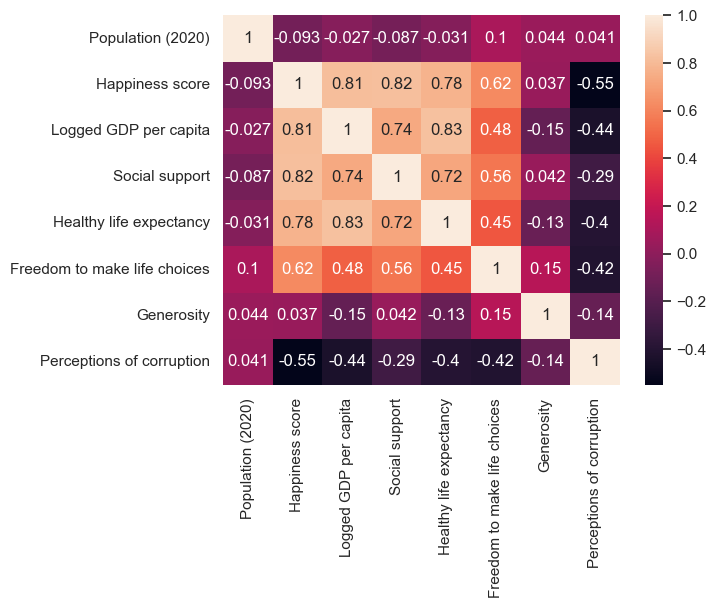

In [5]:
df.corr()
corr_matrix = df.corr()
sb.heatmap(corr_matrix, annot=True)
plt.show()

From the correlation matrix above, the variables with the highest correlation to healthy life expectancy are Happiness score (0.78) , Logged GDP per capita (0.83) and Social Support(0.72)

We then plotted all the variables above in pairs below to understand their nature of their relationship

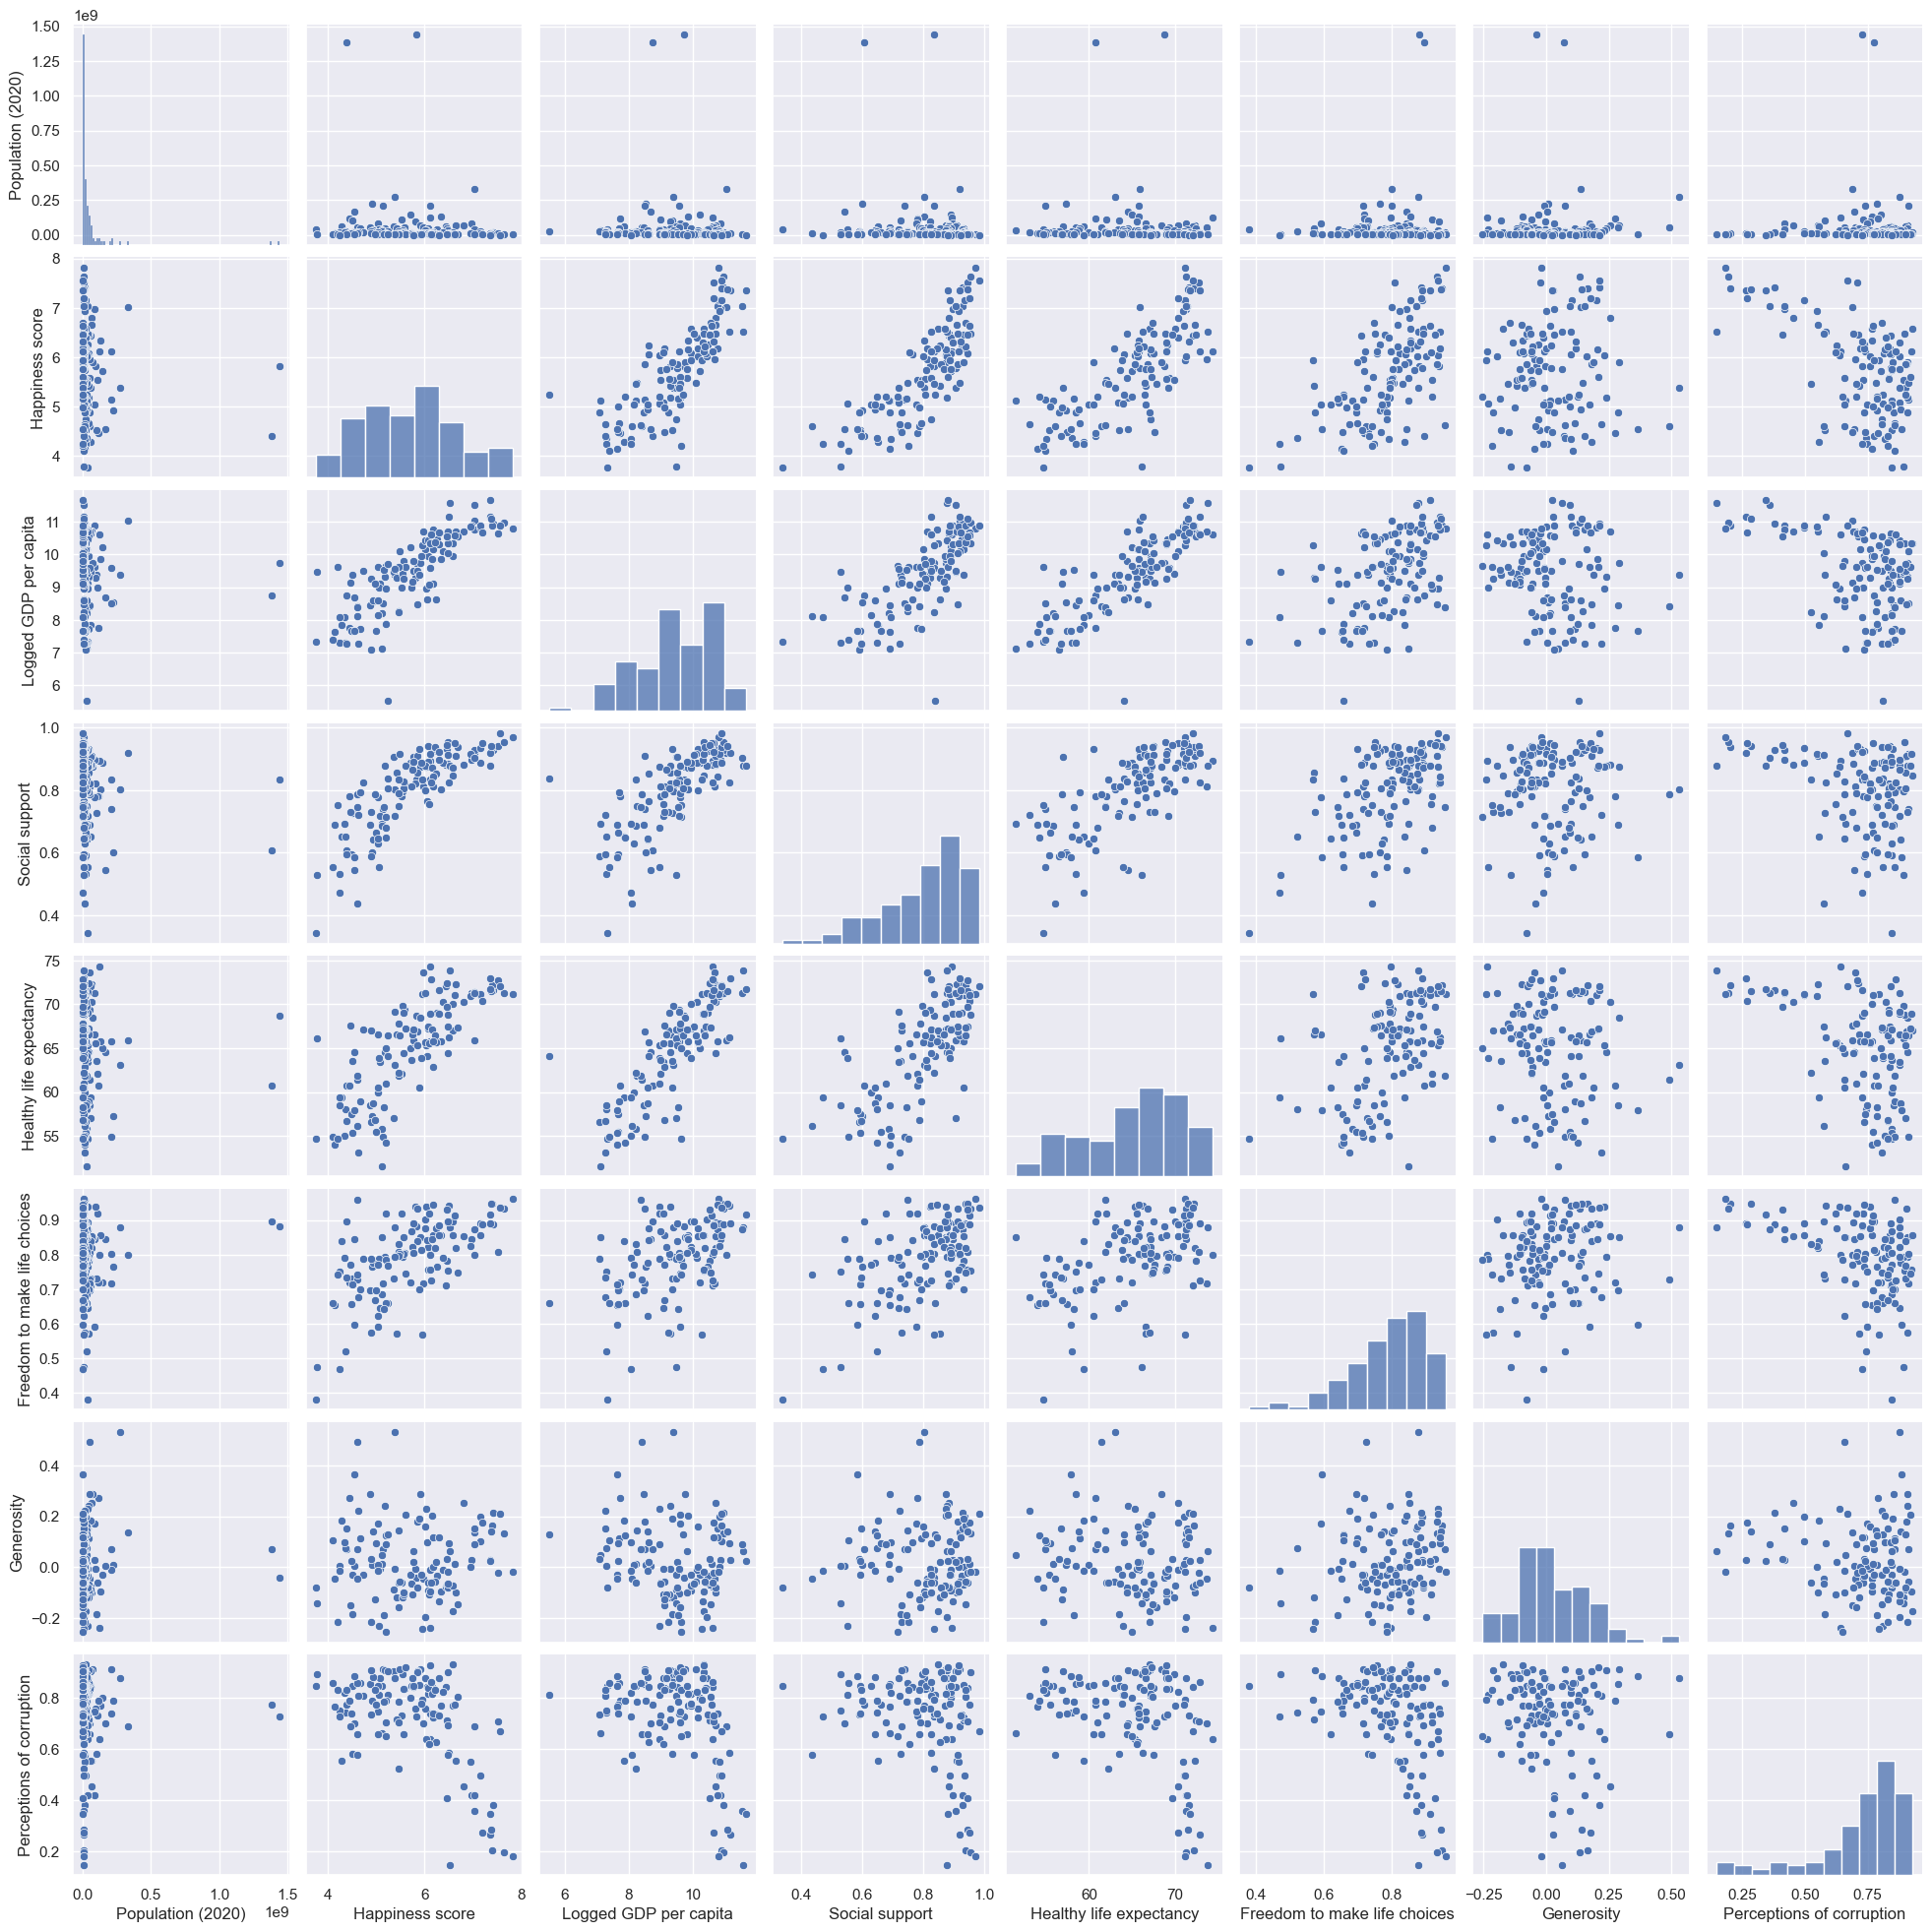

In [6]:
sb.pairplot(data = df)    #pair of those variables against one another

# Machine Learning -  Linear Regression

Firstly, we will use the first highly correlated variable, Logged GDP per capita and conduct linear regression against healthy life expectancy to find its R^2 score and thus how highly correlated it is to life expectancy

# Logged GDP vs Healthy Life Expectancy

In [7]:
# Creating X and y
X = df['Logged GDP per capita']
y = df['Healthy life expectancy']

We split the dataset into train and test set

In [8]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [9]:

# Take a look at the train dataset
X_train
y_train

70     71.150
23     61.388
121    69.650
111    69.150
20     72.050
        ...  
87     66.149
104    65.299
67     63.599
24     58.499
8      64.947
Name: Healthy life expectancy, Length: 89, dtype: float64

# Removing NAN values

In [10]:
df = df.dropna(axis='columns')
df = df.dropna(axis='columns', how ='all')

In [11]:
df = df.apply (pd.to_numeric, errors='coerce')

print (df)

     Population (2020)  Fert. Rate  Med. Age  Country name  Happiness score  \
0           1440297825         1.7        38           NaN            5.828   
1           1382345085         2.2        28           NaN            4.394   
2            331341050         1.8        38           NaN            7.025   
3            274021604         2.3        30           NaN            5.377   
4            221612785         3.6        23           NaN            4.925   
..                 ...         ...       ...           ...              ...   
124             872695         4.2        20           NaN            4.251   
125             628080         1.8        39           NaN            5.768   
126             627704         1.5        40           NaN            7.364   
127             441750         1.5        43           NaN            6.309   
128             341628         1.8        37           NaN            7.557   

     Logged GDP per capita  Social support  Healthy

# Using Something new

We used OLS regression as it provides more statistical information, such as p-values, confidence intervals, and R-squared values. These statistics can help assess the significance and fit of the model to make more informed decisions. Additionally, OLS regression can handle data with missing values and outliers more robustly than simple linear regression.

We then used Statsmodels.api as it gives the R^2 value and the coefficient data directly

In [12]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [13]:

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const                    28.725280
Logged GDP per capita     3.845727
dtype: float64

# OLS Regression Results

In [14]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Healthy life expectancy   R-squared:                       0.696
Model:                                 OLS   Adj. R-squared:                  0.692
Method:                      Least Squares   F-statistic:                     198.9
Date:                     Sat, 22 Apr 2023   Prob (F-statistic):           3.39e-24
Time:                             00:13:48   Log-Likelihood:                -225.38
No. Observations:                       89   AIC:                             454.8
Df Residuals:                           87   BIC:                             459.7
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    28.7253      2.610     11.008      0.000      23.539      33.912
Logged GDP per capita     3.8457      0.273     14.104      0.000       3.304       4.388
==============================================================================
Omnibus:                       20.771   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.773
Skew:                           0.693   Prob(JB):                     1.73e-13
Kurtosis:                       6.732   Cond. No.                         77.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The hyperparameters are the number/ choice of features in the OLS Regression summary table that can also be viewed as a iterative tuning process.

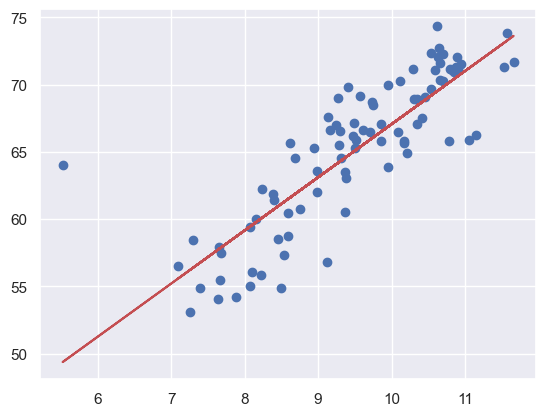

In [15]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 27.5494 + 3.9509*X_train, 'r')
plt.show()

In [16]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the Error Terms

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


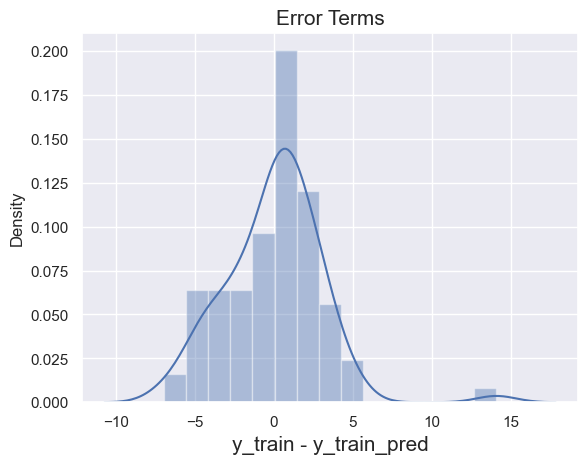

In [17]:
# Plotting the histogram using the residual values
fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

The Histogram of the Residual can be used to check whether the variance is normally distributed or not. As we can see, the residuals are following the normal distribution graph with a mean 0.

# Looking for patterns in residuals

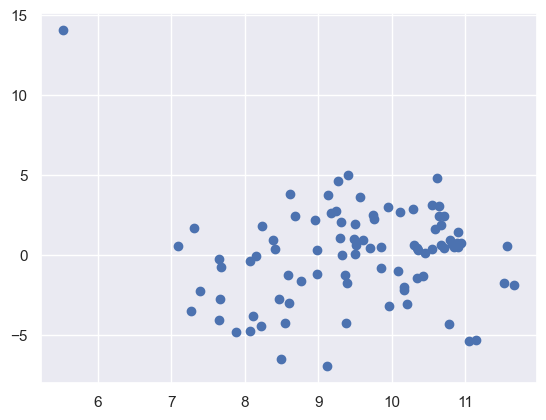

In [18]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

Now, we need to make sure that the residuals are not following any specific pattern and by forming a scatterplot, we can see that they do not follow any specific pattern. Hence, we can use the linear regression model we have built to evaluate test data.

# Using the train data to predict test data

In [19]:

# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

11     58.487364
107    65.705794
106    67.324846
73     70.578331
92     70.882144
21     58.941160
112    69.366927
123    69.532293
25     69.847643
51     58.164323
37     69.932249
28     58.398912
29     67.024879
105    65.821166
116    65.401982
95     71.366705
72     68.832371
33     56.891387
32     63.713708
57     63.782931
119    68.605473
81     71.658981
125    66.463403
35     70.155301
41     56.091476
45     56.760632
26     65.582731
98     56.710638
74     61.933136
84     63.190689
89     61.360122
69     66.455711
115    65.755789
43     60.475605
109    65.701949
22     65.175084
90     63.679096
5      65.575040
36     63.232992
dtype: float64

# Calculating the explained variance

In [20]:

# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.6674145255500081

The explained variance is 0.667 which shows that the gdp is moderately highly correlated to healthy life expectancy

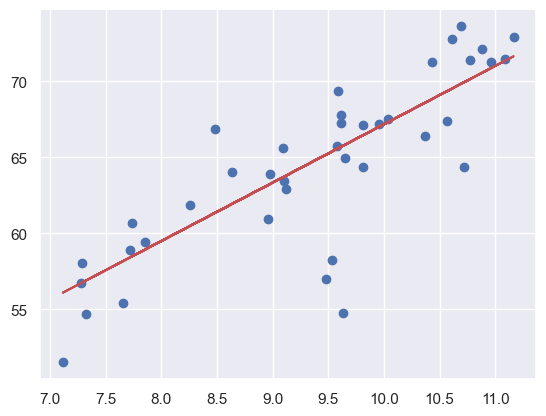

In [21]:

# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

If we can remember from the training data, the R² value of GDP = 0.696

Since the R² value on test data is within 5% of the R² value on training data, we can conclude that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen test set. 



# Happiness Score vs Healthy Life Expectancy

In [22]:
#Linear regression for healthy life expectancy and happiness score

We then move on to the next variable, happiness score

In [23]:
# Creating X and y
X = df['Happiness score']
y = df['Healthy life expectancy']

We split the dataset to train and test set

In [24]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [25]:

# Take a look at the train dataset
X_train
y_train

70     71.150
23     61.388
121    69.650
111    69.150
20     72.050
        ...  
87     66.149
104    65.299
67     63.599
24     58.499
8      64.947
Name: Healthy life expectancy, Length: 89, dtype: float64

# Removing NAN values

In [26]:
df = df.dropna(axis='columns')
df = df.dropna(axis='columns', how ='all')
#drop nan columns

In [27]:
df = df.apply (pd.to_numeric, errors='coerce')

print (df)

     Population (2020)  Fert. Rate  Med. Age  Happiness score  \
0           1440297825         1.7        38            5.828   
1           1382345085         2.2        28            4.394   
2            331341050         1.8        38            7.025   
3            274021604         2.3        30            5.377   
4            221612785         3.6        23            4.925   
..                 ...         ...       ...              ...   
124             872695         4.2        20            4.251   
125             628080         1.8        39            5.768   
126             627704         1.5        40            7.364   
127             441750         1.5        43            6.309   
128             341628         1.8        37            7.557   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                    9.738           0.836                   68.689   
1                    8.759           0.608                   60.777   
2     

In [28]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [29]:

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const              39.642128
Happiness score     4.469111
dtype: float64

# OLS Regression Results

In [30]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Healthy life expectancy   R-squared:                       0.580
Model:                                 OLS   Adj. R-squared:                  0.575
Method:                      Least Squares   F-statistic:                     120.1
Date:                     Sat, 22 Apr 2023   Prob (F-statistic):           4.59e-18
Time:                             00:13:49   Log-Likelihood:                -239.73
No. Observations:                       89   AIC:                             483.5
Df Residuals:                           87   BIC:                             488.4
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              39.6421      2.367     16.747      0.000      34.937      44.347
Happiness score     4.4691      0.408     10.958      0.000       3.659       5.280
==============================================================================
Omnibus:                        0.211   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.069
Skew:                           0.068   Prob(JB):                        0.966
Kurtosis:                       3.013   Cond. No.                         36.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

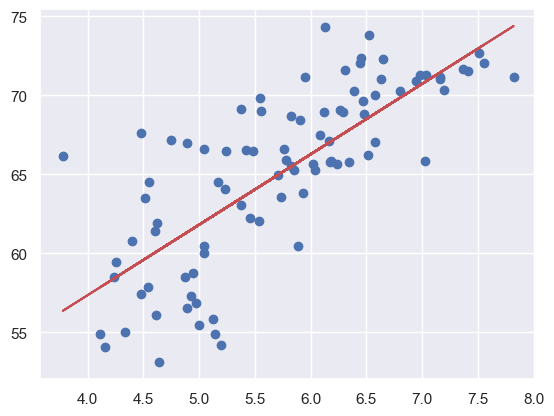

In [31]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 39.5179 + 4.4594*X_train, 'r')
plt.show()

In [32]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the Error Terms

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


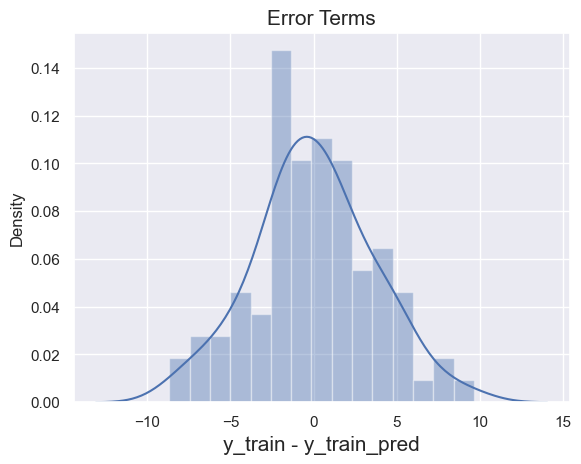

In [33]:
# Plotting the histogram using the residual values
fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

# Looking for patterns in residual

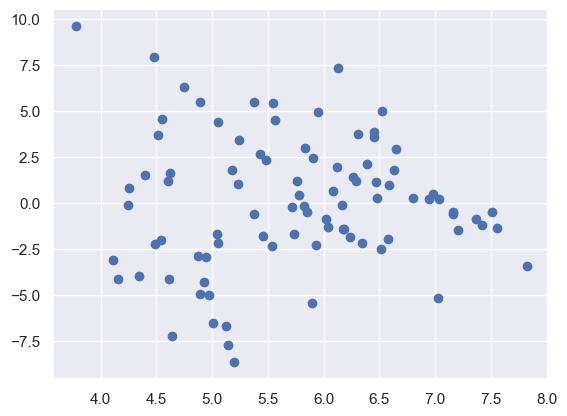

In [34]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

Since there are no patterns in the error terms, we can use the train set to predict the test set

# Using the train data to predict the test data

In [35]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

11     59.569895
107    64.669151
106    68.588561
73     72.731427
92     73.768261
21     58.805677
112    69.527075
123    67.028842
25     66.309315
51     59.824634
37     68.575154
28     60.512878
29     66.774102
105    62.877037
116    62.680396
95     72.642045
72     66.528301
33     56.445986
32     62.363090
57     67.252297
119    67.444469
81     72.557132
125    65.419962
35     71.109140
41     62.532916
45     59.136391
26     64.602114
98     59.288341
74     66.738349
84     62.877037
89     65.817712
69     64.570830
115    58.398988
43     64.106043
109    64.074759
22     63.645724
90     66.930521
5      66.993089
36     62.255831
dtype: float64

# Calculating the Explained Variance

In [36]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.6368332393218228

The explained variance is 0.667 which shows that happiness score is moderately highly correlated to healthy life expectancy

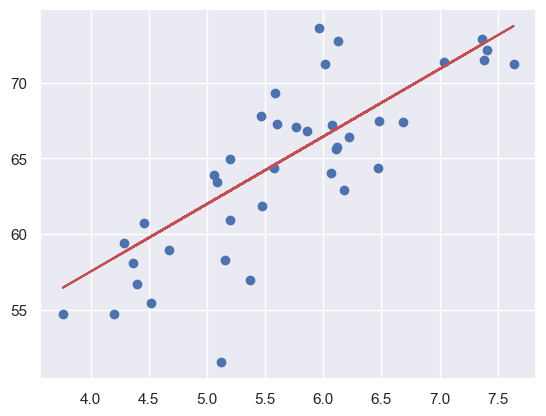

In [37]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# Social Support vs Healthy Life Expectancy

In [38]:
#Linear regression of healthy life expectancy and social support

Now, our final variable, social support

In [39]:
# Creating X and y
X = df['Social support']
y = df['Healthy life expectancy']

We split the data into train and test set

In [40]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [41]:

# Take a look at the train dataset
X_train
y_train

70     71.150
23     61.388
121    69.650
111    69.150
20     72.050
        ...  
87     66.149
104    65.299
67     63.599
24     58.499
8      64.947
Name: Healthy life expectancy, Length: 89, dtype: float64

# Removing NAN values

In [42]:
df = df.dropna(axis='columns')
df = df.dropna(axis='columns', how ='all')

In [43]:
df = df.apply (pd.to_numeric, errors='coerce')

print (df)

     Population (2020)  Fert. Rate  Med. Age  Happiness score  \
0           1440297825         1.7        38            5.828   
1           1382345085         2.2        28            4.394   
2            331341050         1.8        38            7.025   
3            274021604         2.3        30            5.377   
4            221612785         3.6        23            4.925   
..                 ...         ...       ...              ...   
124             872695         4.2        20            4.251   
125             628080         1.8        39            5.768   
126             627704         1.5        40            7.364   
127             441750         1.5        43            6.309   
128             341628         1.8        37            7.557   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                    9.738           0.836                   68.689   
1                    8.759           0.608                   60.777   
2     

In [44]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [45]:

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const             39.560736
Social support    31.956799
dtype: float64

# OLS Regression Results

In [46]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Healthy life expectancy   R-squared:                       0.550
Model:                                 OLS   Adj. R-squared:                  0.545
Method:                      Least Squares   F-statistic:                     106.5
Date:                     Sat, 22 Apr 2023   Prob (F-statistic):           8.96e-17
Time:                             00:13:50   Log-Likelihood:                -242.75
No. Observations:                       89   AIC:                             489.5
Df Residuals:                           87   BIC:                             494.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             39.5607      2.519     15.702      0.000      34.553      44.568
Social support    31.9568      3.096     10.321      0.000      25.803      38.111
==============================================================================
Omnibus:                        1.831   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.400   Jarque-Bera (JB):                1.289
Skew:                          -0.270   Prob(JB):                        0.525
Kurtosis:                       3.237   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

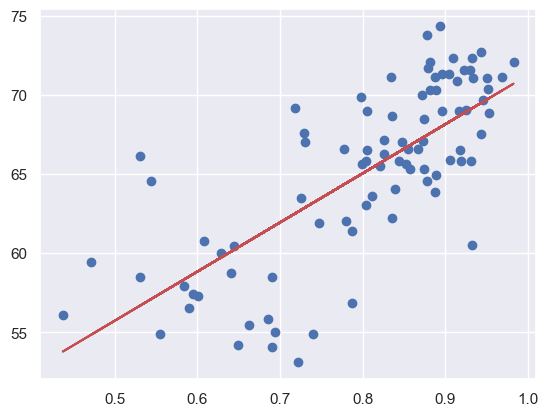

In [47]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 40.2326 + 31.0050*X_train, 'r')
plt.show()

In [48]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the Error Terms

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


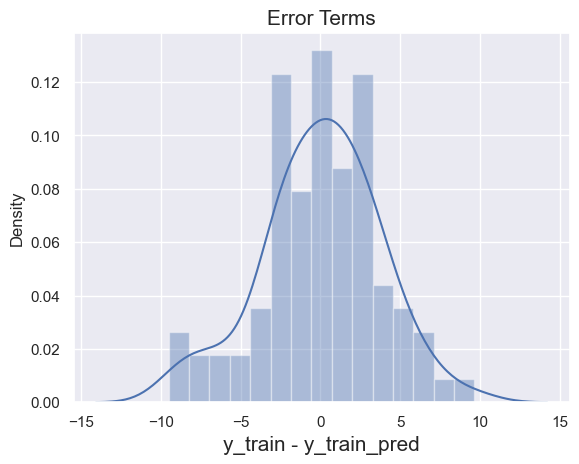

In [49]:
# Plotting the histogram using the residual values
fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

# Looking for patterns in residual

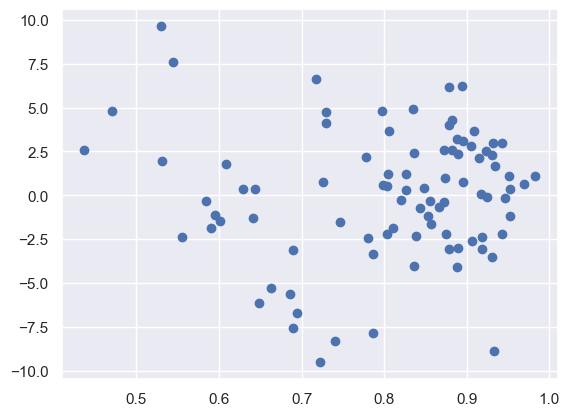

In [50]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

Since there are no patterns in the error terms, we can use the train dataset to predict the test dataset

# Using the train data to predict test data

In [51]:

# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

11     64.550953
107    67.682720
106    68.737294
73     69.568171
92     70.047523
21     60.428526
112    69.568171
123    65.957053
25     65.509657
51     58.511118
37     67.810547
28     64.934435
29     68.034245
105    62.441805
116    63.400509
95     69.695998
72     67.618806
33     50.458005
32     62.505718
57     65.509657
119    69.504257
81     68.960992
125    68.002288
35     69.248603
41     61.674842
45     60.332656
26     65.829225
98     58.606989
74     64.039645
84     61.259403
89     68.673381
69     65.989009
115    63.624206
43     63.464422
109    64.806608
22     68.545553
90     63.688120
5      66.276621
36     57.232846
dtype: float64

# Calculating the Explained Variance

In [52]:

# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.44972725362574284

The explained variance is 0.449 which shows that the gdp is only moderately correlated to healthy life expectancy. Although with happiness and social support, the R^2 value is withing 5%, however it is slightly different from the training data and test data, one being higher by 1 and the other being lower by 1 respectively. 

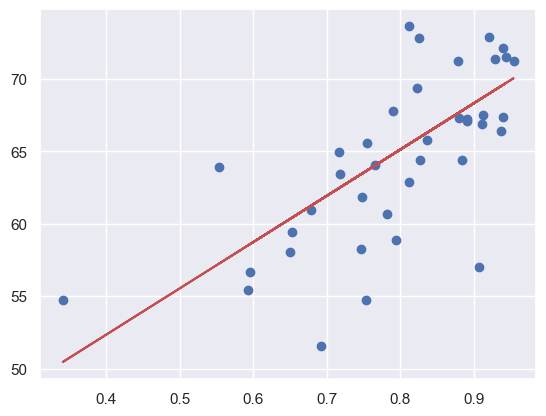

In [53]:

# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

From the Linear Regression line of the test data, we can see that  GDP's relationship with Healthy Life expectancy is the strongest, 2nd place would be the happiness score and 3rd would be social support.


From our linear regression models, we realised that the highest correlation is gdp. However it is still not a very high correlation. Though correlation does not equate to casuation, 0.667, though pretty high, may not necassirily mean if one has higher gdp they will have higher life expectancy.

Additonally, gdp is very close to happiness and so it makes no sense to identify gdp is the highest as happiness can give about the same effect of life expectancy as gdp.

Hence, we decided to do another form of machine learning technique, classification tree which we are doing to see if we can get better results and see if we can identify one variable among the three that is the most correlated to healthy life expectancy

# Machine Learning - Classification Tree

Since our data is in numerical data format and is highly incompatible to be used for a classification tree, we utilised binning to convert the numerical data to categorical data and also reshaped the array from 1-D to 2-D. More explanation for doing so will be provided l;ater in the code when we perform the techniques

We start out with gdp against life expectancy

# Classification Tree for GDP and life expectancy

In [54]:
#Performing Classification tree for GDP and life expectancy

# Removing NAN values

In [149]:
#Dropping data that has NAN
df = df.dropna(axis='columns')
df = df.dropna(axis='columns', how ='all')

In [150]:
df = df.apply (pd.to_numeric, errors='coerce')

print (df)

     Population (2020)  Fert. Rate  Med. Age  Happiness score  \
0           1440297825         1.7        38            5.828   
1           1382345085         2.2        28            4.394   
2            331341050         1.8        38            7.025   
3            274021604         2.3        30            5.377   
4            221612785         3.6        23            4.925   
..                 ...         ...       ...              ...   
124             872695         4.2        20            4.251   
125             628080         1.8        39            5.768   
126             627704         1.5        40            7.364   
127             441750         1.5        43            6.309   
128             341628         1.8        37            7.557   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                    9.738           0.836                   68.689   
1                    8.759           0.608                   60.777   
2     

# Defining the predictior and target Variable

In [151]:
# Define the predictor variables and target variable
predictors = df['Logged GDP per capita']
predictors

0       9.738
1       8.759
2      11.048
3       9.385
4       8.540
        ...  
124     8.075
125     9.813
126    11.660
127    10.661
128    10.896
Name: Logged GDP per capita, Length: 128, dtype: float64

In [152]:
targets = df['Healthy life expectancy']

# Using something new - Discretization


Discretization is a form of binning that is used to convert numerical data to categorical data

Binning can simplify complex numerical data by grouping values into fewer categories. This can make it easier to understand and communicate the data, and can also reduce the complexity of analytical models.

Binned data can be easier to interpret than raw numerical data, especially if the categories are meaningful and intuitive. Binning can also help to identify patterns or trends in the data that may not be immediately obvious from raw numerical values.

Decision trees and random forests, work better with categorical data than numerical data. Binning can therefore improve the performance of these algorithms by converting numerical data into categorical data.

Binning can help to handle outliers and extreme values in the data. By grouping values into categories, outliers can be assigned to the same category as other similar values, reducing their impact on the analysis.

Binning can be useful for comparing data across different groups or time periods. By using the same binning technique for different datasets, the resulting categories can be directly compared, even if the numerical values are different.

Overall, binning can be a useful technique for converting numerical data into categorica

# Converting numeric variables to categorical variables using Discretization

To convert numeric data to categorical data, we will use the median and then predict what will be the cut off values for lower, middle and upper categorical ranges

In [153]:
#to find a suitable range to be put for the labels to change the datas to categorical data
lower= np.percentile(predictors,25)
middle = np.median(predictors)
upper = np.percentile(predictors,75)
maximum = predictors.max()
print(lower)
print(middle)
print(upper)
print(maximum)

8.59475
9.5745
10.47475
11.66


We then use bins to help make the intervals that is needed. The labels are the categorical labels that is assign to the intervals. An example would 0-lower, the categorical labels assigned would be lower

In [154]:
#changing the datas to categorical
bins = [0,lower,middle,upper,maximum+1]
labels = ['Low','Average','High','Very High']

We then proceed on to change the values datas from GDP to a categorical datas by assigning the value to the intervals it belongs to

In [155]:
GDP_categorical = pd.cut(predictors, bins=bins, labels=labels)
GDP_categorical

0           High
1        Average
2      Very High
3        Average
4            Low
         ...    
124          Low
125         High
126    Very High
127    Very High
128    Very High
Name: Logged GDP per capita, Length: 128, dtype: category
Categories (4, object): ['Low' < 'Average' < 'High' < 'Very High']

# Splitting the train and test data set in the ratio of 80:20

In [156]:
# Split the data into training  sets
Healthylife_train,Healthylife_test,GDP_train,GDP_test = train_test_split(targets,GDP_categorical,test_size = 0.2)
dectree_train = DecisionTreeClassifier(max_depth = 4)

In [157]:
Healthylife_train

123    72.802
0      68.689
77     62.226
51     55.403
58     69.000
        ...  
85     65.900
15     66.600
83     54.900
14     65.502
70     71.150
Name: Healthy life expectancy, Length: 102, dtype: float64

# Changing 1D Array to 2D Array

Classification trees in scikit-learn require a 2-dimensional array as input, where each row represents an observation and each column represents a feature. If you have a 1-dimensional array representing a single feature, you will need to reshape it into a 2-dimensional array before using it to train a classification tree model.

We change the predictors array from a 1 dimension to a 2 dimension as each row in the two-dimensional array represents an instance of the data, and each column represents a feature. By considering the values of multiple features, the classification tree is able to make more complex and accurate decisions about the classification of new instances.

In [158]:
#reshape the data from a 1D array to a 2D array
Healthylife_train = np.array(Healthylife_train)
Healthylife_train = Healthylife_train.reshape(-1, 1)
Healthylife_train

array([[72.802],
       [68.689],
       [62.226],
       [55.403],
       [69.   ],
       [59.425],
       [62.9  ],
       [64.05 ],
       [71.3  ],
       [56.095],
       [67.1  ],
       [71.25 ],
       [56.55 ],
       [65.749],
       [58.499],
       [71.052],
       [58.252],
       [67.5  ],
       [71.6  ],
       [65.8  ],
       [63.85 ],
       [73.8  ],
       [68.838],
       [69.049],
       [58.05 ],
       [53.125],
       [66.243],
       [71.05 ],
       [64.399],
       [68.45 ],
       [63.901],
       [73.65 ],
       [72.15 ],
       [55.032],
       [66.852],
       [56.989],
       [70.   ],
       [55.847],
       [71.25 ],
       [72.05 ],
       [70.35 ],
       [66.549],
       [72.35 ],
       [59.401],
       [61.9  ],
       [58.913],
       [71.4  ],
       [64.55 ],
       [67.275],
       [56.7  ],
       [69.15 ],
       [65.299],
       [61.847],
       [67.5  ],
       [70.3  ],
       [65.597],
       [71.55 ],
       [71.675],
       [57.313

# Setting the hyperparamater

We selected the depth of the classification tree as a hyperparameter based on the criterion of achieving a minimum Gini index value at the last depth. This approach was adopted to ensure that the tree model achieved optimal classification performance while avoiding overfitting the training data.

To standardize, all the trees created from this point onwards will be set to 4 so as to ensure the result wld be fair and comparable

In [159]:
# Train the Decision Tree Classifier train model
dectree_train.fit (Healthylife_train,GDP_train)

DecisionTreeClassifier(max_depth=4)

# Plot Decision Tree Train Model

[Text(0.5595238095238095, 0.9, 'Healthy Life Expectancy <= 69.5\ngini = 0.75\nsamples = 102\nvalue = [25, 26, 24, 27]\nclass = Very High'),
 Text(0.2619047619047619, 0.7, 'Healthy Life Expectancy <= 62.563\ngini = 0.698\nsamples = 75\nvalue = [25, 22, 24, 4]\nclass = Low'),
 Text(0.09523809523809523, 0.5, 'Healthy Life Expectancy <= 56.844\ngini = 0.337\nsamples = 28\nvalue = [6, 0, 22, 0]\nclass = High'),
 Text(0.047619047619047616, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0]\nclass = High'),
 Text(0.14285714285714285, 0.3, 'Healthy Life Expectancy <= 57.151\ngini = 0.444\nsamples = 18\nvalue = [6, 0, 12, 0]\nclass = High'),
 Text(0.09523809523809523, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]\nclass = Low'),
 Text(0.19047619047619047, 0.1, 'gini = 0.415\nsamples = 17\nvalue = [5, 0, 12, 0]\nclass = High'),
 Text(0.42857142857142855, 0.5, 'Healthy Life Expectancy <= 65.7\ngini = 0.608\nsamples = 47\nvalue = [19, 22, 2, 4]\nclass = Average'),
 Text(0.3333333333333333

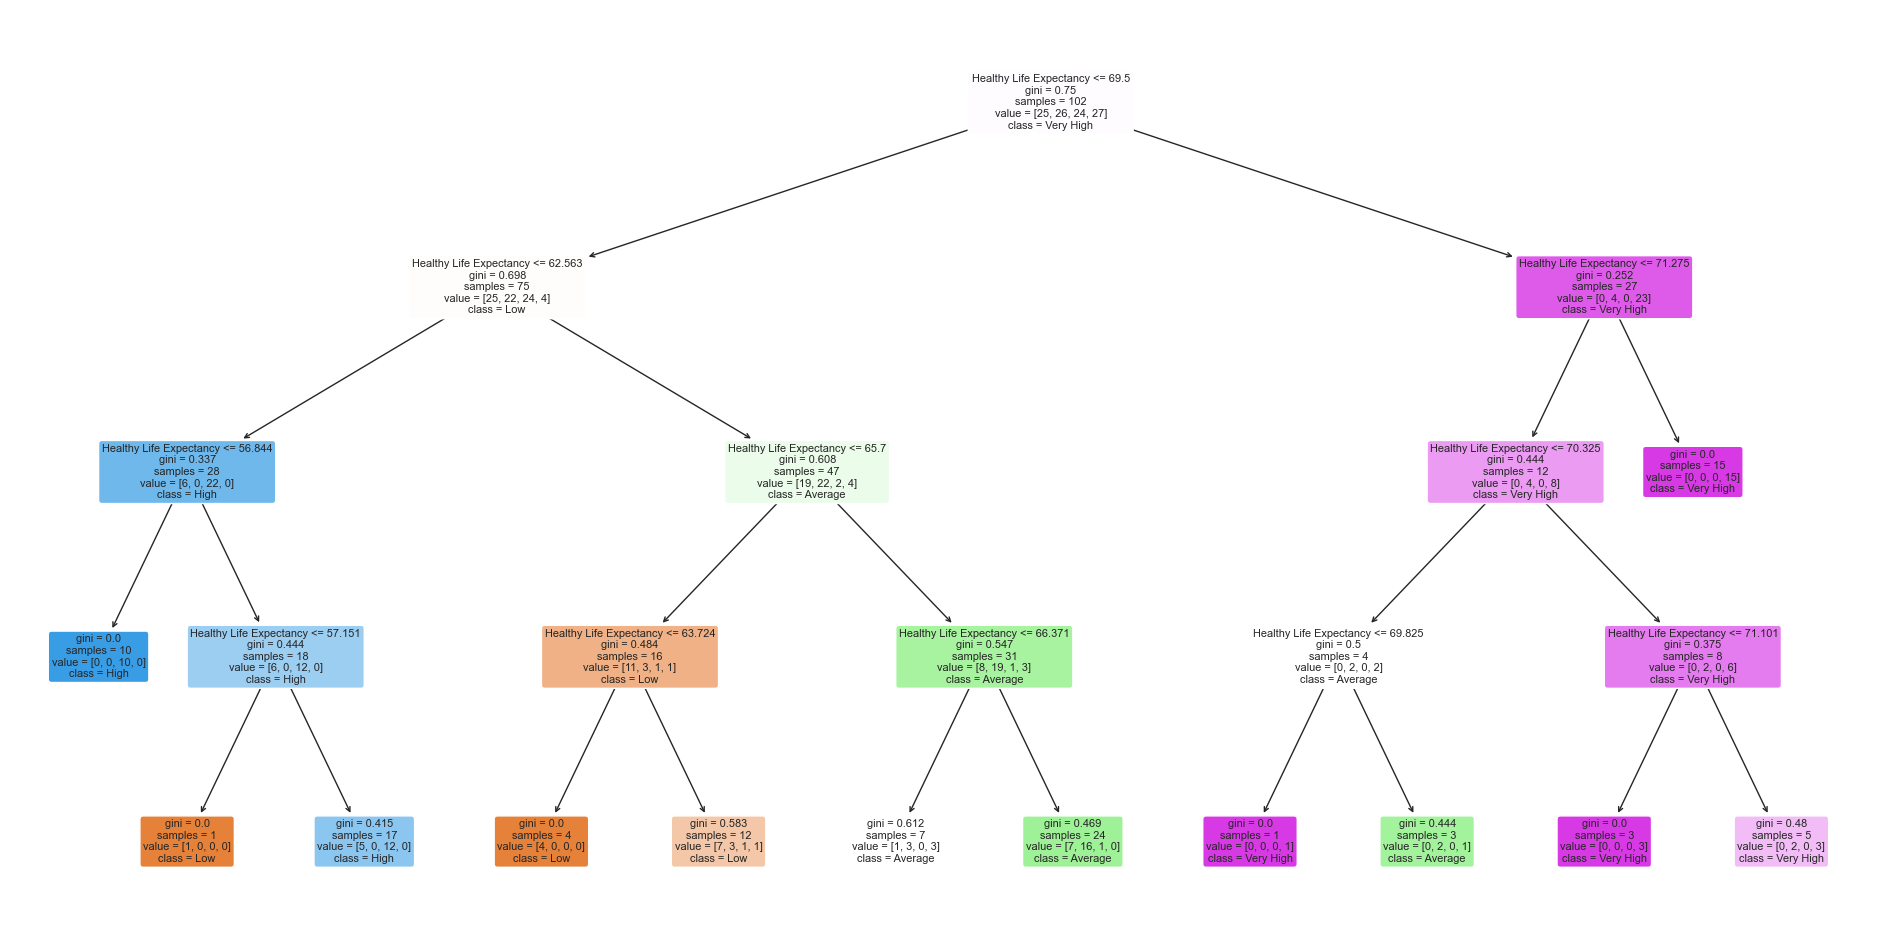

In [160]:
#plot Decision Tree Classifier Train Model
f =plt.figure(figsize=(24,12))
plot_tree(dectree_train, filled = True, rounded = True, feature_names = ["Healthy Life Expectancy"], class_names =["Low","Average","High","Very High"])

We then use the train datas make to create a confusion matrix to help evaluate the accuracy of the model 

In [161]:
# Evaluate the train model
HL_train_pred = dectree_train.predict(Healthylife_train)

# Confusion Matrix for train

<AxesSubplot:>

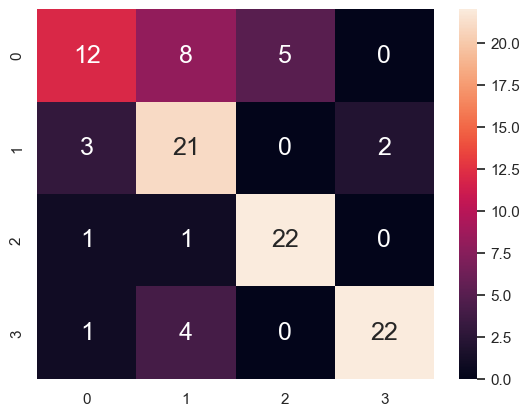

In [162]:
#Print the Confusion Matrix for Healthylife (GDP) train for depth 4 
sb.heatmap(confusion_matrix(GDP_train, HL_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [163]:
# 0 = Low 1 = Average 2= High 3= Very high 

In [164]:
# Evaluate the model
#To check for accuracies of model
print("Classification Accuracy for Train \t:", dectree_train.score(Healthylife_train, GDP_train))

Classification Accuracy for Train 	: 0.7549019607843137


# Calculating TNR, TPR, FNR, FPR for train

We then calculate the positive and negative rates, there are 4 results each for each classes(low,Average, High, Very High) evaluation so when we do calculation for the class low which is at row 0 and column 0. At that spot it will be known as True Positive, while the rest in the same row of the True positive spot is known as False Positive, while as the same column of the True positive spot is known as False Negative. Then the remaining is known as True Negative. This variables will change depending on which class is the calculation been done to.

These metrics provide insight into the model's ability to accurately classify positive and negative instances, and can inform decisions about model tuning and optimization.

TPR represents the proportion of actual positive instances that are correctly identified by the model

In [165]:
Classify_train = confusion_matrix(GDP_train,HL_train_pred)
#True Positive Rate
print("Train - True Positive Rate for low:",Classify_train[0][0]/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3]))
print("Train - True Positive Rate for Average:",Classify_train[1][1]/(Classify_train[0][1]+Classify_train[1][1]+Classify_train[2][1]+Classify_train[3][1]))
print("Train - True Positive Rate for High:",Classify_train[2][2]/(Classify_train[0][2]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[2][3]))
print("Train - True Positive Rate for Very High:",Classify_train[3][3]/(Classify_train[0][3]+Classify_train[1][3]+Classify_train[2][3]+Classify_train[3][3]))

Train - True Positive Rate for low: 0.48
Train - True Positive Rate for Average: 0.6176470588235294
Train - True Positive Rate for High: 0.7857142857142857
Train - True Positive Rate for Very High: 0.9166666666666666


 FPR represents the proportion of actual negative instances that are incorrectly identified as positive.

In [166]:
Classify_train = confusion_matrix(GDP_train,HL_train_pred)
#False Positive Rate
print("Train - False Positive Rate for low:",(Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3])/(Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3]+Classify_train[1][1]+Classify_train[1][2]+Classify_train[1][3]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][1]+Classify_train[3][2]+Classify_train[3][3]))
print("Train - False Positive Rate for Average:",(Classify_train[1][0]+Classify_train[1][2]+Classify_train[1][3])/(Classify_train[0][0]+Classify_train[0][2]+Classify_train[0][3]+Classify_train[2][0]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][0]+Classify_train[3][2]+Classify_train[3][3]+Classify_train[1][0]+Classify_train[1][2]+Classify_train[1][3]))
print("Train - False Positive Rate for High:",(Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][3])/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][3]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][3]+Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][3]+Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][3]))
print("Train - False Positive Rate for Very High:",(Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][2])/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][2]+Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][2]))

Train - False Positive Rate for low: 0.15294117647058825
Train - False Positive Rate for Average: 0.07352941176470588
Train - False Positive Rate for High: 0.02666666666666667
Train - False Positive Rate for Very High: 0.0641025641025641


 TNR represents the proportion of actual negative instances that are correctly identified.

In [167]:
Classify_train = confusion_matrix(GDP_train,HL_train_pred)
#True Negative Rate
print("Train - True Negative Rate for low:",(Classify_train[1][1]+Classify_train[1][2]+Classify_train[1][3]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][1]+Classify_train[3][2]+Classify_train[3][3])/(Classify_train[1][1]+Classify_train[1][2]+Classify_train[1][3]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][1]+Classify_train[3][2]+Classify_train[3][3]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3]))
print("Train - True Negative Rate for Average:",(Classify_train[0][0]+Classify_train[0][2]+Classify_train[0][3]+Classify_train[2][0]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][0]+Classify_train[3][2]+Classify_train[3][3])/(Classify_train[0][0]+Classify_train[0][2]+Classify_train[0][3]+Classify_train[2][0]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][0]+Classify_train[3][2]+Classify_train[3][3]+Classify_train[1][0]+Classify_train[1][2]+Classify_train[1][3]))
print("Train - True Negative Rate for High:",(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][3]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][3]+Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][3])/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][3]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][3]+Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][3]+Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][3]))
print("Train - True Negative Rate for Very High:",(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][2]+Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][2])/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][2]+Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][2]))

Train - True Negative Rate for low: 0.8470588235294118
Train - True Negative Rate for Average: 0.9264705882352942
Train - True Negative Rate for High: 0.9733333333333334
Train - True Negative Rate for Very High: 0.9358974358974359


FNR represents the proportion of actual positive instances that are incorrectly identified as negative.

In [168]:
Classify_train = confusion_matrix(GDP_train,HL_train_pred)
#False Negative Rate
print("Train - False Negative Rate for low:",(Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3])/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3]))
print("Train - False Negative Rate for Average:",(Classify_train[0][1]+Classify_train[2][1]+Classify_train[3][1])/(Classify_train[0][1]+Classify_train[1][1]+Classify_train[2][1]+Classify_train[3][1]))
print("Train - False Negative Rate for High:",(Classify_train[0][2]+Classify_train[2][1]+Classify_train[2][3])/(Classify_train[0][2]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[2][3]))
print("Train - False Negative Rate for Very High:",(Classify_train[0][3]+Classify_train[1][3]+Classify_train[2][3])/(Classify_train[0][3]+Classify_train[1][3]+Classify_train[2][3]+Classify_train[3][3]))

Train - False Negative Rate for low: 0.52
Train - False Negative Rate for Average: 0.38235294117647056
Train - False Negative Rate for High: 0.21428571428571427
Train - False Negative Rate for Very High: 0.08333333333333333


In [169]:
Healthylife_test

112    67.397
114    57.900
41     51.530
53     58.475
13     63.503
82     57.449
20     72.050
63     54.050
87     66.149
109    67.789
64     54.185
69     64.399
1      60.777
102    68.950
74     64.063
39     69.850
68     70.899
119    66.400
80     72.697
11     60.698
113    56.851
33     54.712
19     72.300
115    54.725
40     65.662
38     65.301
Name: Healthy life expectancy, dtype: float64

Again we change the predictors array from a 1 dimension to a 2 dimension as each row in the two-dimensional array represents an instance of the data, and each column represents a feature. By considering the values of multiple features, the classification tree is able to make more complex and accurate decisions about the classification of new instances.

In [170]:
#reshape the data from a 1D array to a 2D array
Healthylife_test= np.array(Healthylife_test)
Healthylife_test=Healthylife_test.reshape(-1, 1)
Healthylife_test

array([[67.397],
       [57.9  ],
       [51.53 ],
       [58.475],
       [63.503],
       [57.449],
       [72.05 ],
       [54.05 ],
       [66.149],
       [67.789],
       [54.185],
       [64.399],
       [60.777],
       [68.95 ],
       [64.063],
       [69.85 ],
       [70.899],
       [66.4  ],
       [72.697],
       [60.698],
       [56.851],
       [54.712],
       [72.3  ],
       [54.725],
       [65.662],
       [65.301]])

In [171]:
dectree_test = DecisionTreeClassifier(max_depth = 4)

In [172]:
# Train the Decision Tree Classifier test model
dectree_test.fit (Healthylife_test,GDP_test)

DecisionTreeClassifier(max_depth=4)

Again setting the hyper paramater, max depth as 4

# Plotting Decision Tree Test Model

[Text(0.5, 0.9, 'Healthy Life Expectancy <= 60.738\ngini = 0.743\nsamples = 26\nvalue = [7, 6, 8, 5]\nclass = High'),
 Text(0.2, 0.7, 'Healthy Life Expectancy <= 54.719\ngini = 0.34\nsamples = 10\nvalue = [1, 1, 8, 0]\nclass = High'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0]\nclass = High'),
 Text(0.3, 0.5, 'Healthy Life Expectancy <= 57.15\ngini = 0.5\nsamples = 6\nvalue = [1, 1, 4, 0]\nclass = High'),
 Text(0.2, 0.3, 'Healthy Life Expectancy <= 55.788\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0, 0]\nclass = Low'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]\nclass = Average'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]\nclass = Low'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0]\nclass = High'),
 Text(0.8, 0.7, 'Healthy Life Expectancy <= 70.375\ngini = 0.664\nsamples = 16\nvalue = [6, 5, 0, 5]\nclass = Low'),
 Text(0.7, 0.5, 'Healthy Life Expectancy <= 64.231\ngini = 0.569\nsamples = 12\nvalue = [6, 5, 0, 

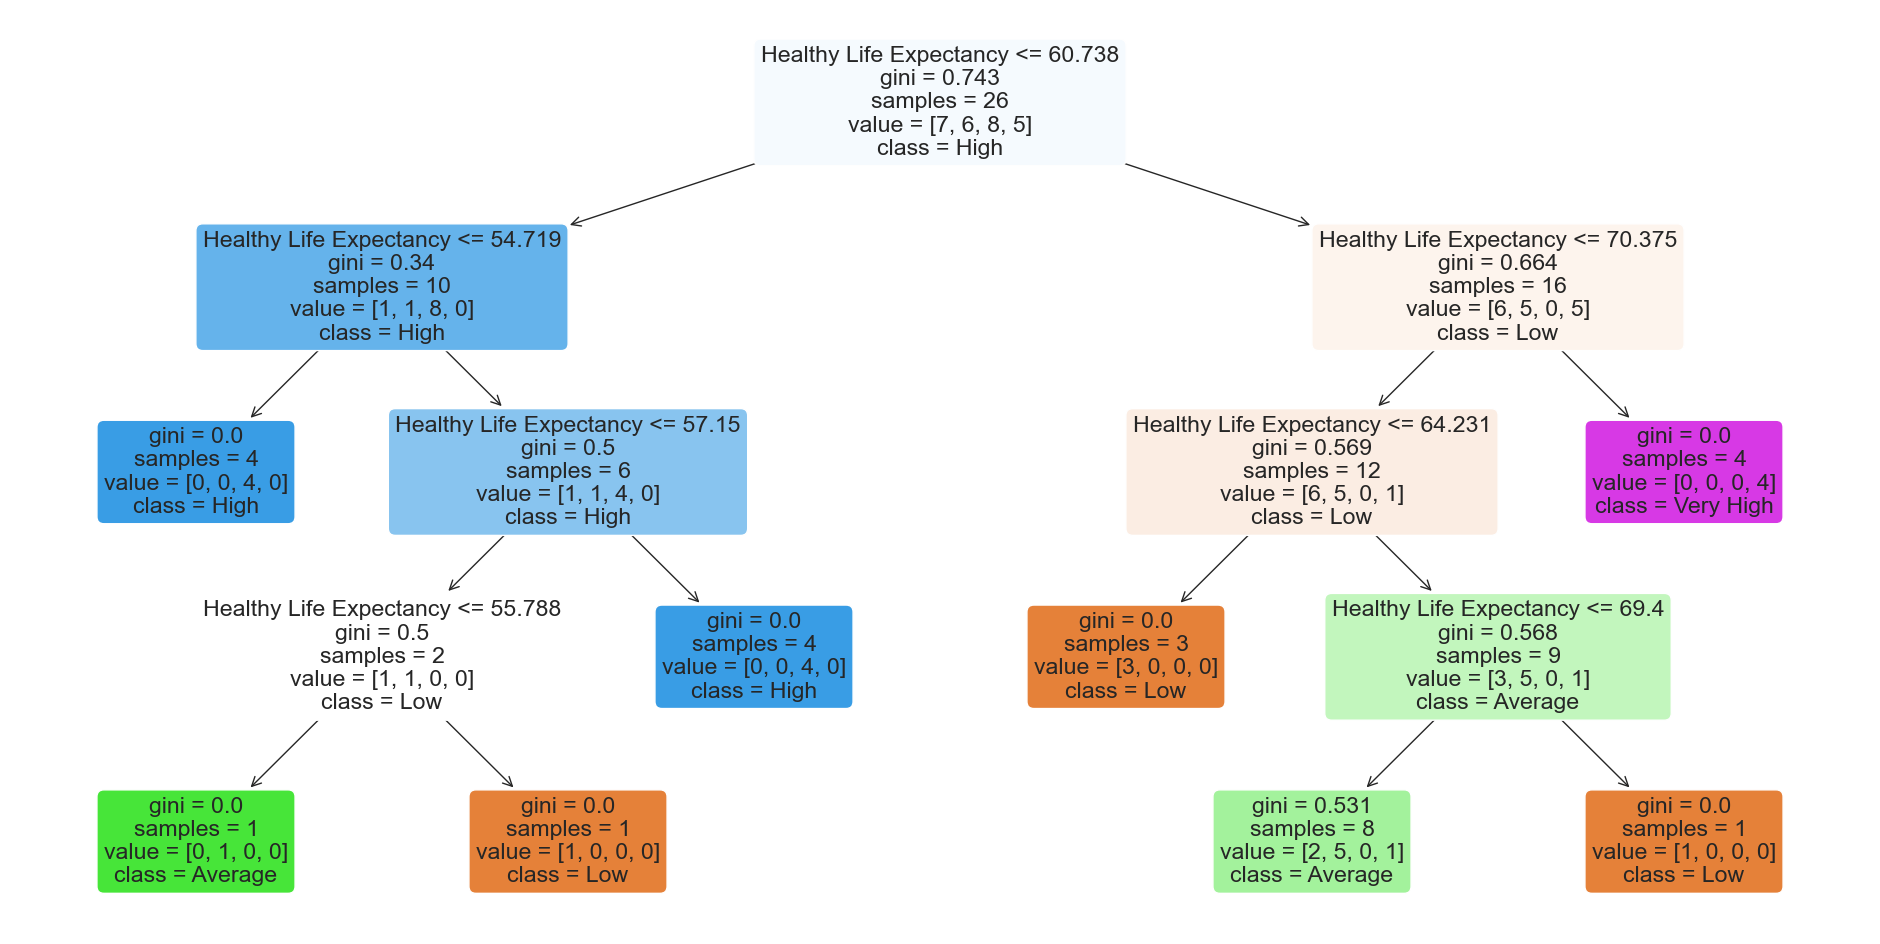

In [173]:
#plot Decision Tree Classifier Test Model
f =plt.figure(figsize=(24,12))
plot_tree(dectree_test, filled = True, rounded = True, feature_names = ["Healthy Life Expectancy"], class_names =["Low","Average","High","Very High"])

We then use the test datas make to create a confusion matrix to help evaluate the accuracy of the model

In [174]:
# Evaluate the test model
HL_test_pred = dectree_train.predict(Healthylife_test)

# Confusion Matrix for Test

<AxesSubplot:>

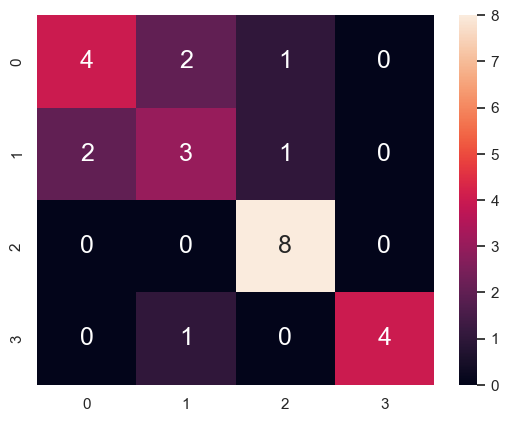

In [175]:
#Print the Confusion Matrix for Healthylife (GDP) test for depth 4 
sb.heatmap(confusion_matrix(GDP_test, HL_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Calculating TNR, TPR, FNR, FPR for Test

In [176]:
# Evaluate the model
#To check for accuracies of model
print("Classification Accuracy for Test \t:", dectree_train.score(Healthylife_test, GDP_test))

Classification Accuracy for Test 	: 0.7307692307692307


We got a classification accuracy of 0.73 which shows that gdp is highly correlated to healthy life expectancy

Similar to just now we then calculate the positive and negative rates, there are 4 results each for each classes(low,Average, High, Very High) evaluation so when we do calculation for the class low which is at row 0 and column 0. At that spot it will be known as True Positive, while the rest in the same row of the True positive spot is known as False Positive, while as the same column of the True positive spot is known as False Negative. Then the remaining is known as True Negative. This variables will change depending on which class is the calculation been done to.

These metrics provide insight into the model's ability to accurately classify positive and negative instances, and can inform decisions about model tuning and optimization.

TPR represents the proportion of actual positive instances that are correctly identified by the model

In [177]:
Classify = confusion_matrix(GDP_test,HL_test_pred)
#True Positive Rate
print("Test - True Positive Rate for low:",Classify[0][0]/(Classify[0][0]+Classify[0][1]+Classify[0][2]+Classify[0][3]))
print("Test - True Positive Rate for Average:",Classify[1][1]/(Classify[0][1]+Classify[1][1]+Classify[2][1]+Classify[3][1]))
print("Test - True Positive Rate for High:",Classify[2][2]/(Classify[0][2]+Classify[2][1]+Classify[2][2]+Classify[2][3]))
print("Test - True Positive Rate for Very High:",Classify[3][3]/(Classify[0][3]+Classify[1][3]+Classify[2][3]+Classify[3][3]))

Test - True Positive Rate for low: 0.5714285714285714
Test - True Positive Rate for Average: 0.5
Test - True Positive Rate for High: 0.8888888888888888
Test - True Positive Rate for Very High: 1.0


FPR represents the proportion of actual negative instances that are incorrectly identified as positive.

In [178]:
Classify = confusion_matrix(GDP_test,HL_test_pred)
#False Positive Rate
print("Test - False Positive Rate for low:",(Classify[0][1]+Classify[0][2]+Classify[0][3])/(Classify[1][1]+Classify[1][2]+Classify[1][3]+Classify[2][1]+Classify[2][2]+Classify[2][3]+Classify[3][1]+Classify[3][2]+Classify[3][3]+Classify[0][1]+Classify[0][2]+Classify[0][3]))
print("Test - False Positive Rate for Average:",(Classify[1][0]+Classify[1][2]+Classify[1][3])/(Classify[0][0]+Classify[0][2]+Classify[0][3]+Classify[2][0]+Classify[2][2]+Classify[2][3]+Classify[3][0]+Classify[3][2]+Classify[3][3]+Classify[1][0]+Classify[1][2]+Classify[1][3]))
print("Test - False Positive Rate for High:",(Classify[2][0]+Classify[2][1]+Classify[2][3])/(Classify[0][0]+Classify[0][1]+Classify[0][3]+Classify[1][0]+Classify[1][1]+Classify[1][3]+Classify[3][0]+Classify[3][1]+Classify[3][3]+Classify[2][0]+Classify[2][1]+Classify[2][3]))
print("Test - False Positive Rate for Very High:",(Classify[3][0]+Classify[3][1]+Classify[3][2])/(Classify[0][0]+Classify[0][1]+Classify[0][2]+Classify[1][0]+Classify[1][1]+Classify[1][2]+Classify[2][0]+Classify[2][1]+Classify[2][2]+Classify[3][0]+Classify[3][1]+Classify[3][2]))

Test - False Positive Rate for low: 0.15
Test - False Positive Rate for Average: 0.15
Test - False Positive Rate for High: 0.0
Test - False Positive Rate for Very High: 0.045454545454545456


TNR represents the proportion of actual negative instances that are correctly identified.

In [179]:
Classify = confusion_matrix(GDP_test,HL_test_pred)
#True Negative Rate
print("Test - True Negative Rate for low:",(Classify[1][1]+Classify[1][2]+Classify[1][3]+Classify[2][1]+Classify[2][2]+Classify[2][3]+Classify[3][1]+Classify[3][2]+Classify[3][3])/(Classify[1][1]+Classify[1][2]+Classify[1][3]+Classify[2][1]+Classify[2][2]+Classify[2][3]+Classify[3][1]+Classify[3][2]+Classify[3][3]+Classify[0][1]+Classify[0][2]+Classify[0][3]))
print("Test - True Negative Rate for Average:",(Classify[0][0]+Classify[0][2]+Classify[0][3]+Classify[2][0]+Classify[2][2]+Classify[2][3]+Classify[3][0]+Classify[3][2]+Classify[3][3])/(Classify[0][0]+Classify[0][2]+Classify[0][3]+Classify[2][0]+Classify[2][2]+Classify[2][3]+Classify[3][0]+Classify[3][2]+Classify[3][3]+Classify[1][0]+Classify[1][2]+Classify[1][3]))
print("Test - True Negative Rate for High:",(Classify[0][0]+Classify[0][1]+Classify[0][3]+Classify[1][0]+Classify[1][1]+Classify[1][3]+Classify[3][0]+Classify[3][1]+Classify[3][3])/(Classify[0][0]+Classify[0][1]+Classify[0][3]+Classify[1][0]+Classify[1][1]+Classify[1][3]+Classify[3][0]+Classify[3][1]+Classify[3][3]+Classify[2][0]+Classify[2][1]+Classify[2][3]))
print("Test - True Negative Rate for Very High:",(Classify[0][0]+Classify[0][1]+Classify[0][2]+Classify[1][0]+Classify[1][1]+Classify[1][2]+Classify[2][0]+Classify[2][1]+Classify[2][2])/(Classify[0][0]+Classify[0][1]+Classify[0][2]+Classify[1][0]+Classify[1][1]+Classify[1][2]+Classify[2][0]+Classify[2][1]+Classify[2][2]+Classify[3][0]+Classify[3][1]+Classify[3][2]))

Test - True Negative Rate for low: 0.85
Test - True Negative Rate for Average: 0.85
Test - True Negative Rate for High: 1.0
Test - True Negative Rate for Very High: 0.9545454545454546


FNR represents the proportion of actual positive instances that are incorrectly identified as negative.

In [180]:
Classify = confusion_matrix(GDP_test,HL_test_pred)
#False Negative Rate
print("Test - False Negative Rate for low:",(Classify[0][1]+Classify[0][2]+Classify[0][3])/(Classify[0][0]+Classify[0][1]+Classify[0][2]+Classify[0][3]))
print("Test - False Negative Rate for Average:",(Classify[0][1]+Classify[2][1]+Classify[3][1])/(Classify[0][1]+Classify[1][1]+Classify[2][1]+Classify[3][1]))
print("Test - False Negative Rate for High:",(Classify[0][2]+Classify[2][1]+Classify[2][3])/(Classify[0][2]+Classify[2][1]+Classify[2][2]+Classify[2][3]))
print("Test - False Negative Rate for Very High:",(Classify[0][3]+Classify[1][3]+Classify[2][3])/(Classify[0][3]+Classify[1][3]+Classify[2][3]+Classify[3][3]))

Test - False Negative Rate for low: 0.42857142857142855
Test - False Negative Rate for Average: 0.5
Test - False Negative Rate for High: 0.1111111111111111
Test - False Negative Rate for Very High: 0.0


# Classification Tree for Happiness Score and Life Expectancy

In [181]:
#Performing Classification tree for Happiness Score and life expectancy

Performing Classification tree for Happiness Score and life expectancy

In [182]:
#Dropping data that has NAN
df = df.dropna(axis='columns')
df = df.dropna(axis='columns', how ='all')

In [183]:
df = df.apply (pd.to_numeric, errors='coerce')

print (df)

     Population (2020)  Fert. Rate  Med. Age  Happiness score  \
0           1440297825         1.7        38            5.828   
1           1382345085         2.2        28            4.394   
2            331341050         1.8        38            7.025   
3            274021604         2.3        30            5.377   
4            221612785         3.6        23            4.925   
..                 ...         ...       ...              ...   
124             872695         4.2        20            4.251   
125             628080         1.8        39            5.768   
126             627704         1.5        40            7.364   
127             441750         1.5        43            6.309   
128             341628         1.8        37            7.557   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                    9.738           0.836                   68.689   
1                    8.759           0.608                   60.777   
2     

# Defining the predictor and target variable

In [184]:
# Define the predictor variables and target variable
predictors = df['Happiness score']
predictors

0      5.828
1      4.394
2      7.025
3      5.377
4      4.925
       ...  
124    4.251
125    5.768
126    7.364
127    6.309
128    7.557
Name: Happiness score, Length: 128, dtype: float64

In [185]:
targets = df['Healthy life expectancy']

# Converting numerical data into categorical data using Discretization

To convert numeric data to categorical data, we will use the median and then predict what will be the cut off values for lower, middle and upper categorical ranges

In [186]:
#to find a suitable range to be put for the labels to change the datas to categorical data
lower= np.percentile(predictors,25)
middle = np.median(predictors)
upper = np.percentile(predictors,75)
maximum = predictors.max()
print(lower)
print(middle)
print(upper)
print(maximum)

5.0352500000000004
5.7645
6.3535
7.821


We then use bins to help make the intervals that is needed. The labels are the categorical labels that is assign to the intervals. An example would 0-lower, the categorical labels assigned would be lower

In [187]:
#changing the datas to categorical
bins = [0,lower,middle,upper,maximum+1]
labels = ['Low','Average','High','Very High']

We then proceed on to change the values datas from Happiness Score to a categorical datas by assigning the value to the intervals it belongs to.

In [188]:
Happy_categorical = pd.cut(predictors, bins=bins, labels=labels)
Happy_categorical

0           High
1            Low
2      Very High
3        Average
4            Low
         ...    
124          Low
125         High
126    Very High
127         High
128    Very High
Name: Happiness score, Length: 128, dtype: category
Categories (4, object): ['Low' < 'Average' < 'High' < 'Very High']

# Splitting the data into train-test set in the ratio of 80:20

In [189]:
# Split the data into training and test sets
Healthylife_train,Healthylife_test,Happy_train,Happy_test = train_test_split(targets,Happy_categorical,test_size = 0.2)
dectree_train = DecisionTreeClassifier(max_depth = 4)
dectree_test = DecisionTreeClassifier(max_depth = 4)

# Reshape data from 1D array to 2D array

We change the predictors array from a 1 dimension to a 2 dimension as each row in the two-dimensional array represents an instance of the data, and each column represents a feature. By considering the values of multiple features, the classification tree is able to make more complex and accurate decisions about the classification of new instances.

In [190]:
#reshape the data from a 1D array to a 2D array
Healthylife_train = np.array(Healthylife_train)
Healthylife_train = Healthylife_train.reshape(-1, 1)
Healthylife_train

array([[62.9  ],
       [58.913],
       [54.725],
       [66.852],
       [71.3  ],
       [56.989],
       [64.063],
       [65.301],
       [67.15 ],
       [66.5  ],
       [57.449],
       [71.15 ],
       [72.697],
       [67.   ],
       [56.851],
       [72.05 ],
       [55.847],
       [66.5  ],
       [56.095],
       [66.243],
       [73.65 ],
       [67.5  ],
       [58.05 ],
       [71.15 ],
       [61.9  ],
       [55.403],
       [67.5  ],
       [58.252],
       [67.051],
       [59.425],
       [67.1  ],
       [56.55 ],
       [65.85 ],
       [54.05 ],
       [54.712],
       [71.55 ],
       [68.95 ],
       [56.7  ],
       [68.95 ],
       [59.401],
       [62.226],
       [72.3  ],
       [64.399],
       [55.032],
       [60.946],
       [66.549],
       [72.35 ],
       [58.499],
       [72.15 ],
       [73.8  ],
       [51.53 ],
       [65.299],
       [71.052],
       [64.399],
       [65.749],
       [65.8  ],
       [70.3  ],
       [64.947],
       [67.088

In [191]:
# Train the Decision Tree Classifier train model
dectree_train.fit (Healthylife_train,Happy_train)

DecisionTreeClassifier(max_depth=4)

# Plot Decision Tree for Train

[Text(0.3958333333333333, 0.9, 'Healthy Life Expectancy <= 62.063\ngini = 0.749\nsamples = 102\nvalue = [25, 28, 23, 26]\nclass = Average'),
 Text(0.125, 0.7, 'Healthy Life Expectancy <= 52.79\ngini = 0.447\nsamples = 29\nvalue = [8, 1, 20, 0]\nclass = High'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]\nclass = Low'),
 Text(0.16666666666666666, 0.5, 'Healthy Life Expectancy <= 59.712\ngini = 0.426\nsamples = 28\nvalue = [7, 1, 20, 0]\nclass = High'),
 Text(0.08333333333333333, 0.3, 'Healthy Life Expectancy <= 58.363\ngini = 0.32\nsamples = 20\nvalue = [4, 0, 16, 0]\nclass = High'),
 Text(0.041666666666666664, 0.1, 'gini = 0.391\nsamples = 15\nvalue = [4, 0, 11, 0]\nclass = High'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5, 0]\nclass = High'),
 Text(0.25, 0.3, 'Healthy Life Expectancy <= 60.599\ngini = 0.594\nsamples = 8\nvalue = [3, 1, 4, 0]\nclass = High'),
 Text(0.20833333333333334, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [2, 1,

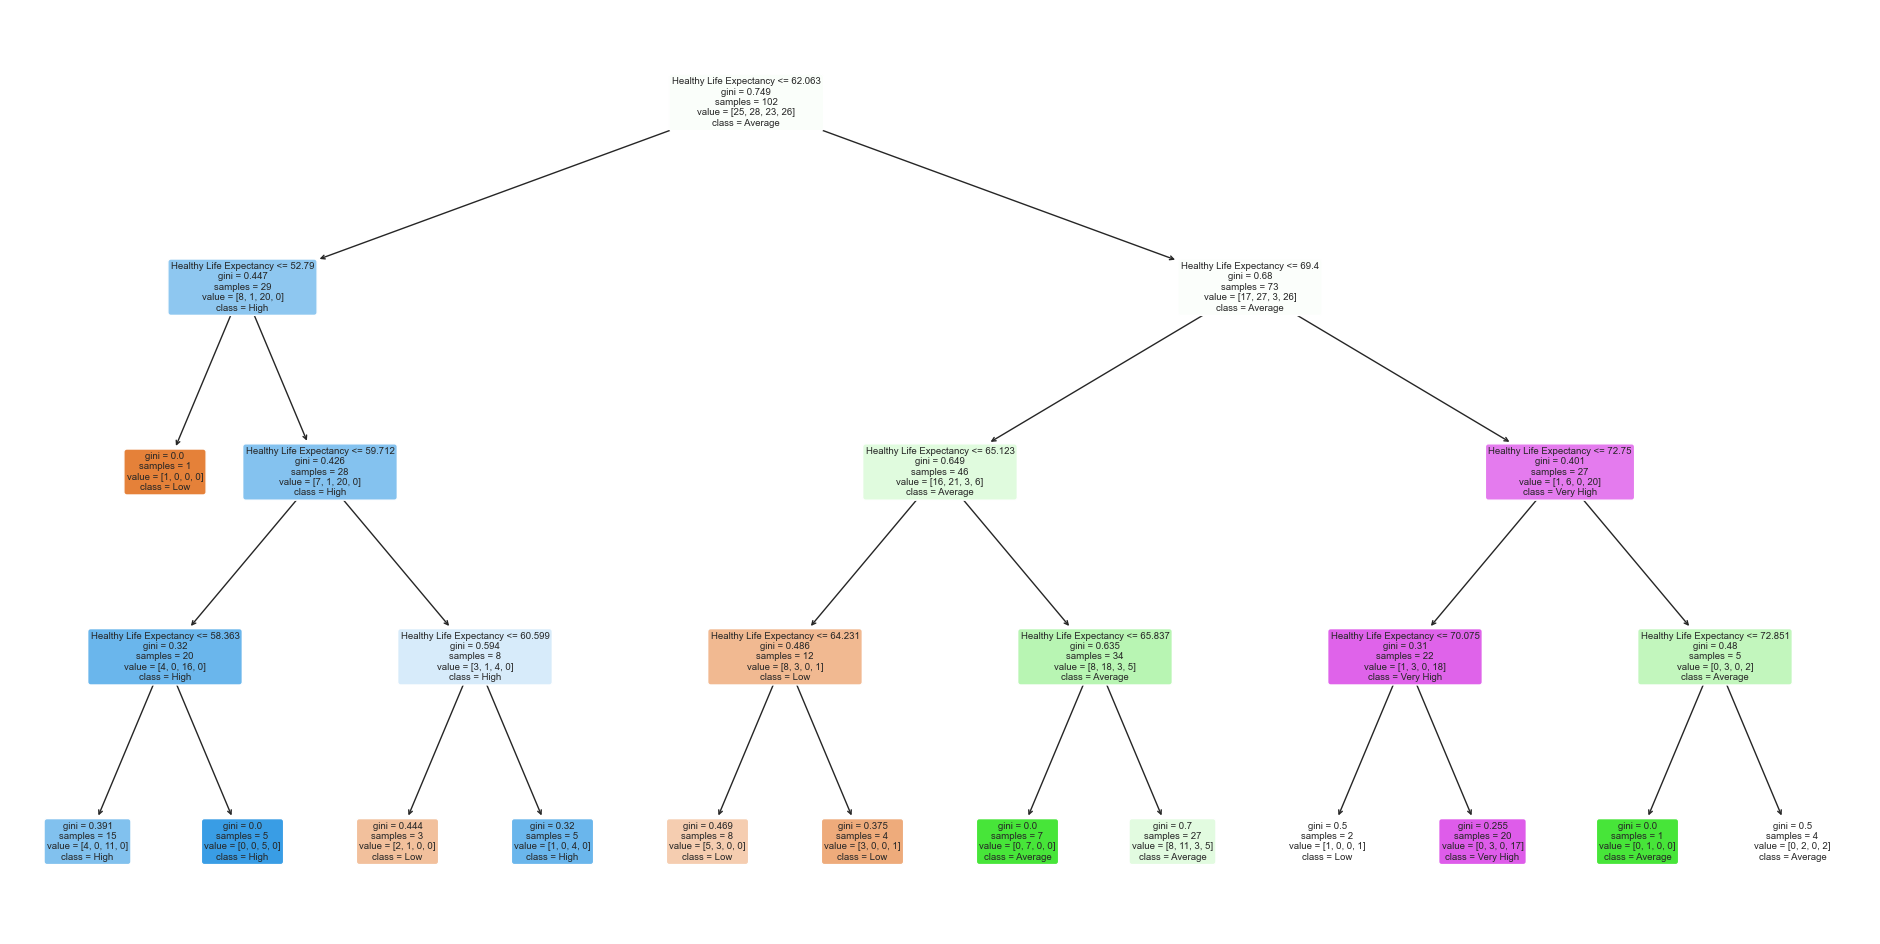

In [192]:
#plot Decision Tree Classifier Train Model
f =plt.figure(figsize=(24,12))
plot_tree(dectree_train, filled = True, rounded = True, feature_names = ["Healthy Life Expectancy"], class_names =["Low","Average","High","Very High"])

We then use the train datas make to create a confusion matrix to help evaluate the accuracy of the model

In [193]:
# Evaluate the train model
HL_train_pred = dectree_train.predict(Healthylife_train)

# Confusion Matrix for Train

<AxesSubplot:>

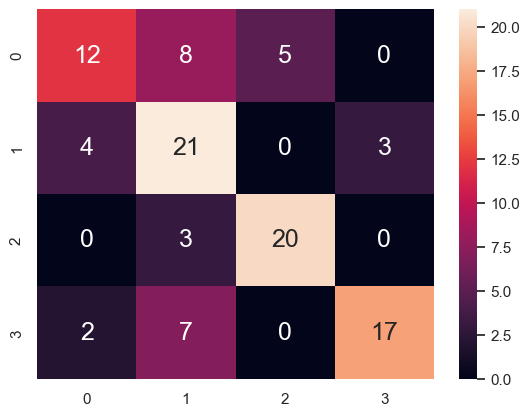

In [194]:
#Print the Confusion Matrix for Healthylife (Happy) train for depth 4 
sb.heatmap(confusion_matrix(Happy_train, HL_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [195]:
# 0 = Low 1 = Average 2= High 3= Very high 

# Calculating TNR, TPR, FNR, FPR for train

In [196]:
# Evaluate the model
#To check for accuracies of model
print("Classification Accuracy for Train \t:", dectree_train.score(Healthylife_train, Happy_train))

Classification Accuracy for Train 	: 0.6862745098039216


Similar to just now we then calculate the positive and negative rates, there are 4 results each for each classes(low,Average, High, Very High) evaluation so when we do calculation for the class low which is at row 0 and column 0. At that spot it will be known as True Positive, while the rest in the same row of the True positive spot is known as False Positive, while as the same column of the True positive spot is known as False Negative. Then the remaining is known as True Negative. This variables will change depending on which class is the calculation been done to.

These metrics provide insight into the model's ability to accurately classify positive and negative instances, and can inform decisions about model tuning and optimization.


TPR represents the proportion of actual positive instances that are correctly identified by the model

In [197]:
Classify_train = confusion_matrix(Happy_train,HL_train_pred)
#True Positive Rate
print("Train - True Positive Rate for low:",Classify_train[0][0]/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3]))
print("Train - True Positive Rate for Average:",Classify_train[1][1]/(Classify_train[0][1]+Classify_train[1][1]+Classify_train[2][1]+Classify_train[3][1]))
print("Train - True Positive Rate for High:",Classify_train[2][2]/(Classify_train[0][2]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[2][3]))
print("Train - True Positive Rate for Very High:",Classify_train[3][3]/(Classify_train[0][3]+Classify_train[1][3]+Classify_train[2][3]+Classify_train[3][3]))

Train - True Positive Rate for low: 0.48
Train - True Positive Rate for Average: 0.5384615384615384
Train - True Positive Rate for High: 0.7142857142857143
Train - True Positive Rate for Very High: 0.85


FPR represents the proportion of actual negative instances that are incorrectly identified as positive.

In [198]:
Classify_train = confusion_matrix(Happy_train,HL_train_pred)
#False Positive Rate
print("Train - False Positive Rate for low:",(Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3])/(Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3]+Classify_train[1][1]+Classify_train[1][2]+Classify_train[1][3]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][1]+Classify_train[3][2]+Classify_train[3][3]))
print("Train - False Positive Rate for Average:",(Classify_train[1][0]+Classify_train[1][2]+Classify_train[1][3])/(Classify_train[0][0]+Classify_train[0][2]+Classify_train[0][3]+Classify_train[2][0]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][0]+Classify_train[3][2]+Classify_train[3][3]+Classify_train[1][0]+Classify_train[1][2]+Classify_train[1][3]))
print("Train - False Positive Rate for High:",(Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][3])/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][3]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][3]+Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][3]+Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][3]))
print("Train - False Positive Rate for Very High:",(Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][2])/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][2]+Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][2]))

Train - False Positive Rate for low: 0.15476190476190477
Train - False Positive Rate for Average: 0.1111111111111111
Train - False Positive Rate for High: 0.03896103896103896
Train - False Positive Rate for Very High: 0.10975609756097561


TNR represents the proportion of actual negative instances that are correctly identified.

In [199]:
Classify_train = confusion_matrix(Happy_train,HL_train_pred)
#True Negative Rate
print("Train - True Negative Rate for low:",(Classify_train[1][1]+Classify_train[1][2]+Classify_train[1][3]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][1]+Classify_train[3][2]+Classify_train[3][3])/(Classify_train[1][1]+Classify_train[1][2]+Classify_train[1][3]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][1]+Classify_train[3][2]+Classify_train[3][3]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3]))
print("Train - True Negative Rate for Average:",(Classify_train[0][0]+Classify_train[0][2]+Classify_train[0][3]+Classify_train[2][0]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][0]+Classify_train[3][2]+Classify_train[3][3])/(Classify_train[0][0]+Classify_train[0][2]+Classify_train[0][3]+Classify_train[2][0]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][0]+Classify_train[3][2]+Classify_train[3][3]+Classify_train[1][0]+Classify_train[1][2]+Classify_train[1][3]))
print("Train - True Negative Rate for High:",(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][3]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][3]+Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][3])/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][3]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][3]+Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][3]+Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][3]))
print("Train - True Negative Rate for Very High:",(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][2]+Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][2])/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][2]+Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][2]))

Train - True Negative Rate for low: 0.8452380952380952
Train - True Negative Rate for Average: 0.8888888888888888
Train - True Negative Rate for High: 0.961038961038961
Train - True Negative Rate for Very High: 0.8902439024390244


FNR represents the proportion of actual positive instances that are incorrectly identified as negative.

In [200]:
Classify_train = confusion_matrix(Happy_train,HL_train_pred)
#False Negative Rate
print("Train - False Negative Rate for low:",(Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3])/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3]))
print("Train - False Negative Rate for Average:",(Classify_train[0][1]+Classify_train[2][1]+Classify_train[3][1])/(Classify_train[0][1]+Classify_train[1][1]+Classify_train[2][1]+Classify_train[3][1]))
print("Train - False Negative Rate for High:",(Classify_train[0][2]+Classify_train[2][1]+Classify_train[2][3])/(Classify_train[0][2]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[2][3]))
print("Train - False Negative Rate for Very High:",(Classify_train[0][3]+Classify_train[1][3]+Classify_train[2][3])/(Classify_train[0][3]+Classify_train[1][3]+Classify_train[2][3]+Classify_train[3][3]))

Train - False Negative Rate for low: 0.52
Train - False Negative Rate for Average: 0.46153846153846156
Train - False Negative Rate for High: 0.2857142857142857
Train - False Negative Rate for Very High: 0.15


We change the predictors array from a 1 dimension to a 2 dimension as each row in the two-dimensional array represents an instance of the data, and each column represents a feature. By considering the values of multiple features, the classification tree is able to make more complex and accurate decisions about the classification of new instances.

In [201]:
#Test Model for (Happy life) Healthy life expectancy
#reshape the data from a 1D array to a 2D array
Healthylife_test= np.array(Healthylife_test)
Healthylife_test=Healthylife_test.reshape(-1, 1)
Healthylife_test

array([[67.6  ],
       [71.25 ],
       [65.662],
       [58.763],
       [53.125],
       [68.45 ],
       [57.313],
       [57.9  ],
       [63.415],
       [55.461],
       [70.   ],
       [54.185],
       [64.95 ],
       [62.038],
       [54.9  ],
       [70.899],
       [69.35 ],
       [65.65 ],
       [67.397],
       [65.502],
       [61.847],
       [71.4  ],
       [64.548],
       [71.15 ],
       [67.789],
       [63.503]])

In [202]:

dectree_test = DecisionTreeClassifier(max_depth = 4)

In [203]:
# Train the Decision Tree Classifier test model
dectree_test.fit (Healthylife_test,Happy_test)

DecisionTreeClassifier(max_depth=4)

# Plot decision tree for test model

[Text(0.6, 0.9, 'Healthy Life Expectancy <= 69.675\ngini = 0.731\nsamples = 26\nvalue = [7, 4, 9, 6]\nclass = High'),
 Text(0.5, 0.7, 'Healthy Life Expectancy <= 60.305\ngini = 0.667\nsamples = 21\nvalue = [7, 4, 9, 1]\nclass = High'),
 Text(0.3, 0.5, 'Healthy Life Expectancy <= 54.543\ngini = 0.245\nsamples = 7\nvalue = [1, 0, 6, 0]\nclass = High'),
 Text(0.2, 0.3, 'Healthy Life Expectancy <= 53.655\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0]\nclass = Low'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]\nclass = High'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]\nclass = Low'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5, 0]\nclass = High'),
 Text(0.7, 0.5, 'Healthy Life Expectancy <= 63.459\ngini = 0.684\nsamples = 14\nvalue = [6, 4, 3, 1]\nclass = Low'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0]\nclass = Low'),
 Text(0.8, 0.3, 'Healthy Life Expectancy <= 64.749\ngini = 0.711\nsamples = 11\nvalue = [3, 4, 3, 

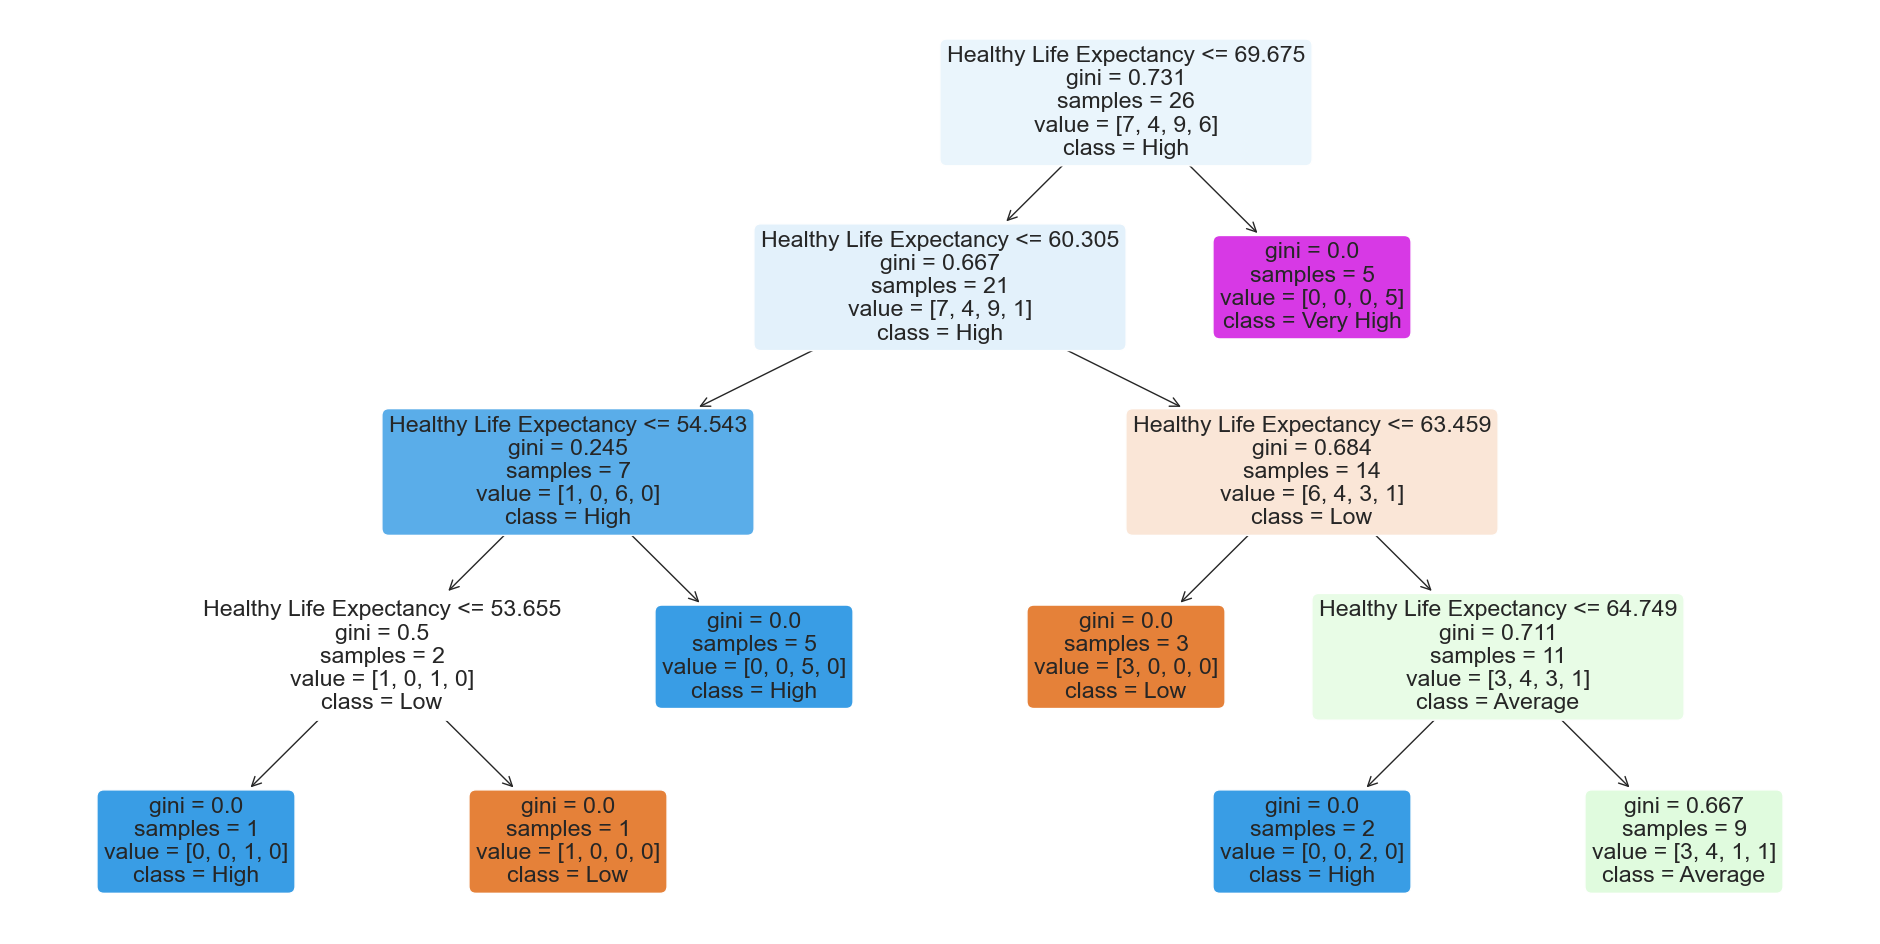

In [204]:
#plot Decision Tree Classifier Test Model
f =plt.figure(figsize=(24,12))
plot_tree(dectree_test, filled = True, rounded = True, feature_names = ["Healthy Life Expectancy"], class_names =["Low","Average","High","Very High"])

We then use the test datas make to create a confusion matrix to help evaluate the accuracy of the model

In [205]:
# Evaluate the test model
HL_test_pred = dectree_train.predict(Healthylife_test)

# Confusion Matrix for Test

<AxesSubplot:>

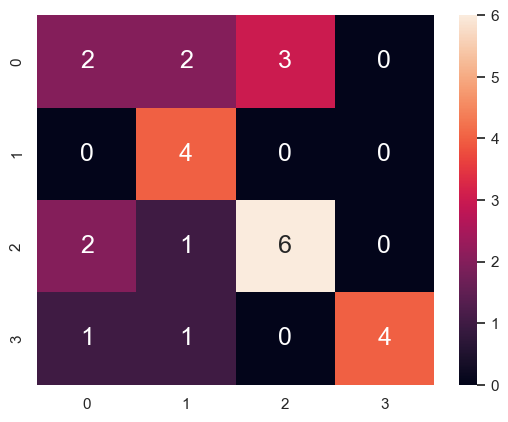

In [206]:
#Print the Confusion Matrix for Healthylife (Happy) test for depth 4 
sb.heatmap(confusion_matrix(Happy_test, HL_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [207]:
# Evaluate the model
#To check for accuracies of model
print("Classification Accuracy for Test \t:", dectree_train.score(Healthylife_test, Happy_test))

Classification Accuracy for Test 	: 0.6153846153846154


We got a classification accuracy of 0.695 and thus happines is moderately highly correlated to life expectancy

# Calculating TNR, TPR, FNR, FPR for test

Similar to just now we then calculate the positive and negative rates, there are 4 results each for each classes(low,Average, High, Very High) evaluation so when we do calculation for the class low which is at row 0 and column 0. At that spot it will be known as True Positive, while the rest in the same row of the True positive spot is known as False Positive, while as the same column of the True positive spot is known as False Negative. Then the remaining is known as True Negative. This variables will change depending on which class is the calculation been done to.

These metrics provide insight into the model's ability to accurately classify positive and negative instances, and can inform decisions about model tuning and optimization.


TPR represents the proportion of actual positive instances that are correctly identified by the model

Classify = confusion_matrix(Happy_test,HL_test_pred)
#True Positive Rate
print("Test - True Positive Rate for low:",Classify[0][0]/(Classify[0][0]+Classify[0][1]+Classify[0][2]+Classify[0][3]))
print("Test - True Positive Rate for Average:",Classify[1][1]/(Classify[0][1]+Classify[1][1]+Classify[2][1]+Classify[3][1]))
print("Test - True Positive Rate for High:",Classify[2][2]/(Classify[0][2]+Classify[2][1]+Classify[2][2]+Classify[2][3]))
print("Test - True Positive Rate for Very High:",Classify[3][3]/(Classify[0][3]+Classify[1][3]+Classify[2][3]+Classify[3][3]))

FPR represents the proportion of actual negative instances that are incorrectly identified as positive.

In [209]:
Classify = confusion_matrix(Happy_test,HL_test_pred)
#False Positive Rate
print("Test - False Positive Rate for low:",(Classify[0][1]+Classify[0][2]+Classify[0][3])/(Classify[1][1]+Classify[1][2]+Classify[1][3]+Classify[2][1]+Classify[2][2]+Classify[2][3]+Classify[3][1]+Classify[3][2]+Classify[3][3]+Classify[0][1]+Classify[0][2]+Classify[0][3]))
print("Test - False Positive Rate for Average:",(Classify[1][0]+Classify[1][2]+Classify[1][3])/(Classify[0][0]+Classify[0][2]+Classify[0][3]+Classify[2][0]+Classify[2][2]+Classify[2][3]+Classify[3][0]+Classify[3][2]+Classify[3][3]+Classify[1][0]+Classify[1][2]+Classify[1][3]))
print("Test - False Positive Rate for High:",(Classify[2][0]+Classify[2][1]+Classify[2][3])/(Classify[0][0]+Classify[0][1]+Classify[0][3]+Classify[1][0]+Classify[1][1]+Classify[1][3]+Classify[3][0]+Classify[3][1]+Classify[3][3]+Classify[2][0]+Classify[2][1]+Classify[2][3]))
print("Test - False Positive Rate for Very High:",(Classify[3][0]+Classify[3][1]+Classify[3][2])/(Classify[0][0]+Classify[0][1]+Classify[0][2]+Classify[1][0]+Classify[1][1]+Classify[1][2]+Classify[2][0]+Classify[2][1]+Classify[2][2]+Classify[3][0]+Classify[3][1]+Classify[3][2]))

Test - False Positive Rate for low: 0.23809523809523808
Test - False Positive Rate for Average: 0.0
Test - False Positive Rate for High: 0.17647058823529413
Test - False Positive Rate for Very High: 0.09090909090909091


TNR represents the proportion of actual negative instances that are correctly identified.

In [210]:
Classify = confusion_matrix(Happy_test,HL_test_pred)
#True Negative Rate
print("Test - True Negative Rate for low:",(Classify[1][1]+Classify[1][2]+Classify[1][3]+Classify[2][1]+Classify[2][2]+Classify[2][3]+Classify[3][1]+Classify[3][2]+Classify[3][3])/(Classify[1][1]+Classify[1][2]+Classify[1][3]+Classify[2][1]+Classify[2][2]+Classify[2][3]+Classify[3][1]+Classify[3][2]+Classify[3][3]+Classify[0][1]+Classify[0][2]+Classify[0][3]))
print("Test - True Negative Rate for Average:",(Classify[0][0]+Classify[0][2]+Classify[0][3]+Classify[2][0]+Classify[2][2]+Classify[2][3]+Classify[3][0]+Classify[3][2]+Classify[3][3])/(Classify[0][0]+Classify[0][2]+Classify[0][3]+Classify[2][0]+Classify[2][2]+Classify[2][3]+Classify[3][0]+Classify[3][2]+Classify[3][3]+Classify[1][0]+Classify[1][2]+Classify[1][3]))
print("Test - True Negative Rate for High:",(Classify[0][0]+Classify[0][1]+Classify[0][3]+Classify[1][0]+Classify[1][1]+Classify[1][3]+Classify[3][0]+Classify[3][1]+Classify[3][3])/(Classify[0][0]+Classify[0][1]+Classify[0][3]+Classify[1][0]+Classify[1][1]+Classify[1][3]+Classify[3][0]+Classify[3][1]+Classify[3][3]+Classify[2][0]+Classify[2][1]+Classify[2][3]))
print("Test - True Negative Rate for Very High:",(Classify[0][0]+Classify[0][1]+Classify[0][2]+Classify[1][0]+Classify[1][1]+Classify[1][2]+Classify[2][0]+Classify[2][1]+Classify[2][2])/(Classify[0][0]+Classify[0][1]+Classify[0][2]+Classify[1][0]+Classify[1][1]+Classify[1][2]+Classify[2][0]+Classify[2][1]+Classify[2][2]+Classify[3][0]+Classify[3][1]+Classify[3][2]))

Test - True Negative Rate for low: 0.7619047619047619
Test - True Negative Rate for Average: 1.0
Test - True Negative Rate for High: 0.8235294117647058
Test - True Negative Rate for Very High: 0.9090909090909091


FNR represents the proportion of actual positive instances that are incorrectly identified as negative.

In [211]:
Classify = confusion_matrix(Happy_test,HL_test_pred)
#False Negative Rate
print("Test - False Negative Rate for low:",(Classify[0][1]+Classify[0][2]+Classify[0][3])/(Classify[0][0]+Classify[0][1]+Classify[0][2]+Classify[0][3]))
print("Test - False Negative Rate for Average:",(Classify[0][1]+Classify[2][1]+Classify[3][1])/(Classify[0][1]+Classify[1][1]+Classify[2][1]+Classify[3][1]))
print("Test - False Negative Rate for High:",(Classify[0][2]+Classify[2][1]+Classify[2][3])/(Classify[0][2]+Classify[2][1]+Classify[2][2]+Classify[2][3]))
print("Test - False Negative Rate for Very High:",(Classify[0][3]+Classify[1][3]+Classify[2][3])/(Classify[0][3]+Classify[1][3]+Classify[2][3]+Classify[3][3]))

Test - False Negative Rate for low: 0.7142857142857143
Test - False Negative Rate for Average: 0.5
Test - False Negative Rate for High: 0.4
Test - False Negative Rate for Very High: 0.0


# Classification tree for Social Support and Life Expectancy

In [212]:
#Performing Classification tree for Social Support and life expectancy

Performing Classification tree for Social Support and life expectancy

# Removing NAN values

In [243]:
#Dropping data that has NAN
df = df.dropna(axis='columns')
df = df.dropna(axis='columns', how ='all')

In [244]:
df = df.apply (pd.to_numeric, errors='coerce')

print (df)

     Population (2020)  Fert. Rate  Med. Age  Happiness score  \
0           1440297825         1.7        38            5.828   
1           1382345085         2.2        28            4.394   
2            331341050         1.8        38            7.025   
3            274021604         2.3        30            5.377   
4            221612785         3.6        23            4.925   
..                 ...         ...       ...              ...   
124             872695         4.2        20            4.251   
125             628080         1.8        39            5.768   
126             627704         1.5        40            7.364   
127             441750         1.5        43            6.309   
128             341628         1.8        37            7.557   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                    9.738           0.836                   68.689   
1                    8.759           0.608                   60.777   
2     

# Defining the predictor variable and target variable

In [245]:
# Define the predictor variables and target variable
predictors = df['Social support']
predictors

0      0.836
1      0.608
2      0.919
3      0.804
4      0.601
       ...  
124    0.471
125    0.890
126    0.879
127    0.923
128    0.983
Name: Social support, Length: 128, dtype: float64

In [246]:
targets = df['Healthy life expectancy']

# Convert numerical data to categorical data using Discretization

To convert numeric data to categorical data, we will use the median and then predict what will be the cut off values for lower, middle and upper categorical ranges

In [247]:
#to find a suitable range to be put for the labels to change the datas to categorical data
lower= np.percentile(predictors,25)
middle = np.median(predictors)
upper = np.percentile(predictors,75)
maximum = predictors.max()
print(lower)
print(middle)
print(upper)
print(maximum)

0.725
0.831
0.89825
0.983


We then use bins to help make the intervals that is needed. The labels are the categorical labels that is assign to the intervals. An example would 0-lower, the categorical labels assigned would be lower

In [248]:
#changing the datas to categorical
bins = [0,lower,middle,upper,maximum+1]
labels = ['Low','Average','High','Very High']

We then proceed on to change the values datas from Social Support to a categorical datas by assigning the value to the intervals it belongs to

In [249]:
SS_categorical = pd.cut(predictors, bins=bins, labels=labels)
SS_categorical

0           High
1            Low
2      Very High
3        Average
4            Low
         ...    
124          Low
125         High
126         High
127    Very High
128    Very High
Name: Social support, Length: 128, dtype: category
Categories (4, object): ['Low' < 'Average' < 'High' < 'Very High']

# Splitting the data into train-test set in the ratio of 80:20

In [250]:
# Split the data into training and test sets
Healthylife_train,Healthylife_test,SS_train,SS_test = train_test_split(targets,SS_categorical,test_size = 0.2)
dectree_train = DecisionTreeClassifier(max_depth = 4)
dectree_test = DecisionTreeClassifier(max_depth = 4)

# Reshape data from 1D array to 2D array

We change the predictors array from a 1 dimension to a 2 dimension as each row in the two-dimensional array represents an instance of the data, and each column represents a feature. By considering the values of multiple features, the classification tree is able to make more complex and accurate decisions about the classification of new instances.

In [251]:
#reshape the data from a 1D array to a 2D array
Healthylife_train = np.array(Healthylife_train)
Healthylife_train = Healthylife_train.reshape(-1, 1)
Healthylife_train

array([[71.55 ],
       [72.05 ],
       [73.8  ],
       [62.226],
       [51.53 ],
       [61.388],
       [72.15 ],
       [58.913],
       [62.038],
       [65.301],
       [63.048],
       [68.689],
       [73.65 ],
       [71.25 ],
       [57.313],
       [54.185],
       [65.749],
       [55.847],
       [66.4  ],
       [72.35 ],
       [56.851],
       [58.252],
       [65.299],
       [70.3  ],
       [66.243],
       [65.662],
       [67.088],
       [66.549],
       [58.05 ],
       [71.052],
       [65.597],
       [67.051],
       [66.5  ],
       [67.6  ],
       [56.095],
       [63.85 ],
       [65.85 ],
       [54.725],
       [65.502],
       [71.15 ],
       [71.05 ],
       [63.503],
       [58.763],
       [64.95 ],
       [72.697],
       [65.8  ],
       [59.401],
       [64.947],
       [58.475],
       [61.9  ],
       [71.15 ],
       [54.9  ],
       [67.1  ],
       [64.548],
       [55.461],
       [69.85 ],
       [66.852],
       [72.802],
       [64.55 

In [252]:
# Train the Decision Tree Classifier train model
dectree_train.fit (Healthylife_train,SS_train)

DecisionTreeClassifier(max_depth=4)

# Decision Tree for Train set

[Text(0.3472222222222222, 0.9, 'Healthy Life Expectancy <= 60.587\ngini = 0.748\nsamples = 102\nvalue = [28, 28, 23, 23]\nclass = Low'),
 Text(0.1111111111111111, 0.7, 'Healthy Life Expectancy <= 54.719\ngini = 0.33\nsamples = 24\nvalue = [5, 0, 19, 0]\nclass = High'),
 Text(0.05555555555555555, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0]\nclass = High'),
 Text(0.16666666666666666, 0.5, 'Healthy Life Expectancy <= 54.896\ngini = 0.375\nsamples = 20\nvalue = [5, 0, 15, 0]\nclass = High'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]\nclass = Low'),
 Text(0.2222222222222222, 0.3, 'Healthy Life Expectancy <= 56.776\ngini = 0.278\nsamples = 18\nvalue = [3, 0, 15, 0]\nclass = High'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6, 0]\nclass = High'),
 Text(0.2777777777777778, 0.1, 'gini = 0.375\nsamples = 12\nvalue = [3, 0, 9, 0]\nclass = High'),
 Text(0.5833333333333334, 0.7, 'Healthy Life Expectancy <= 65.801\ngini = 0.6

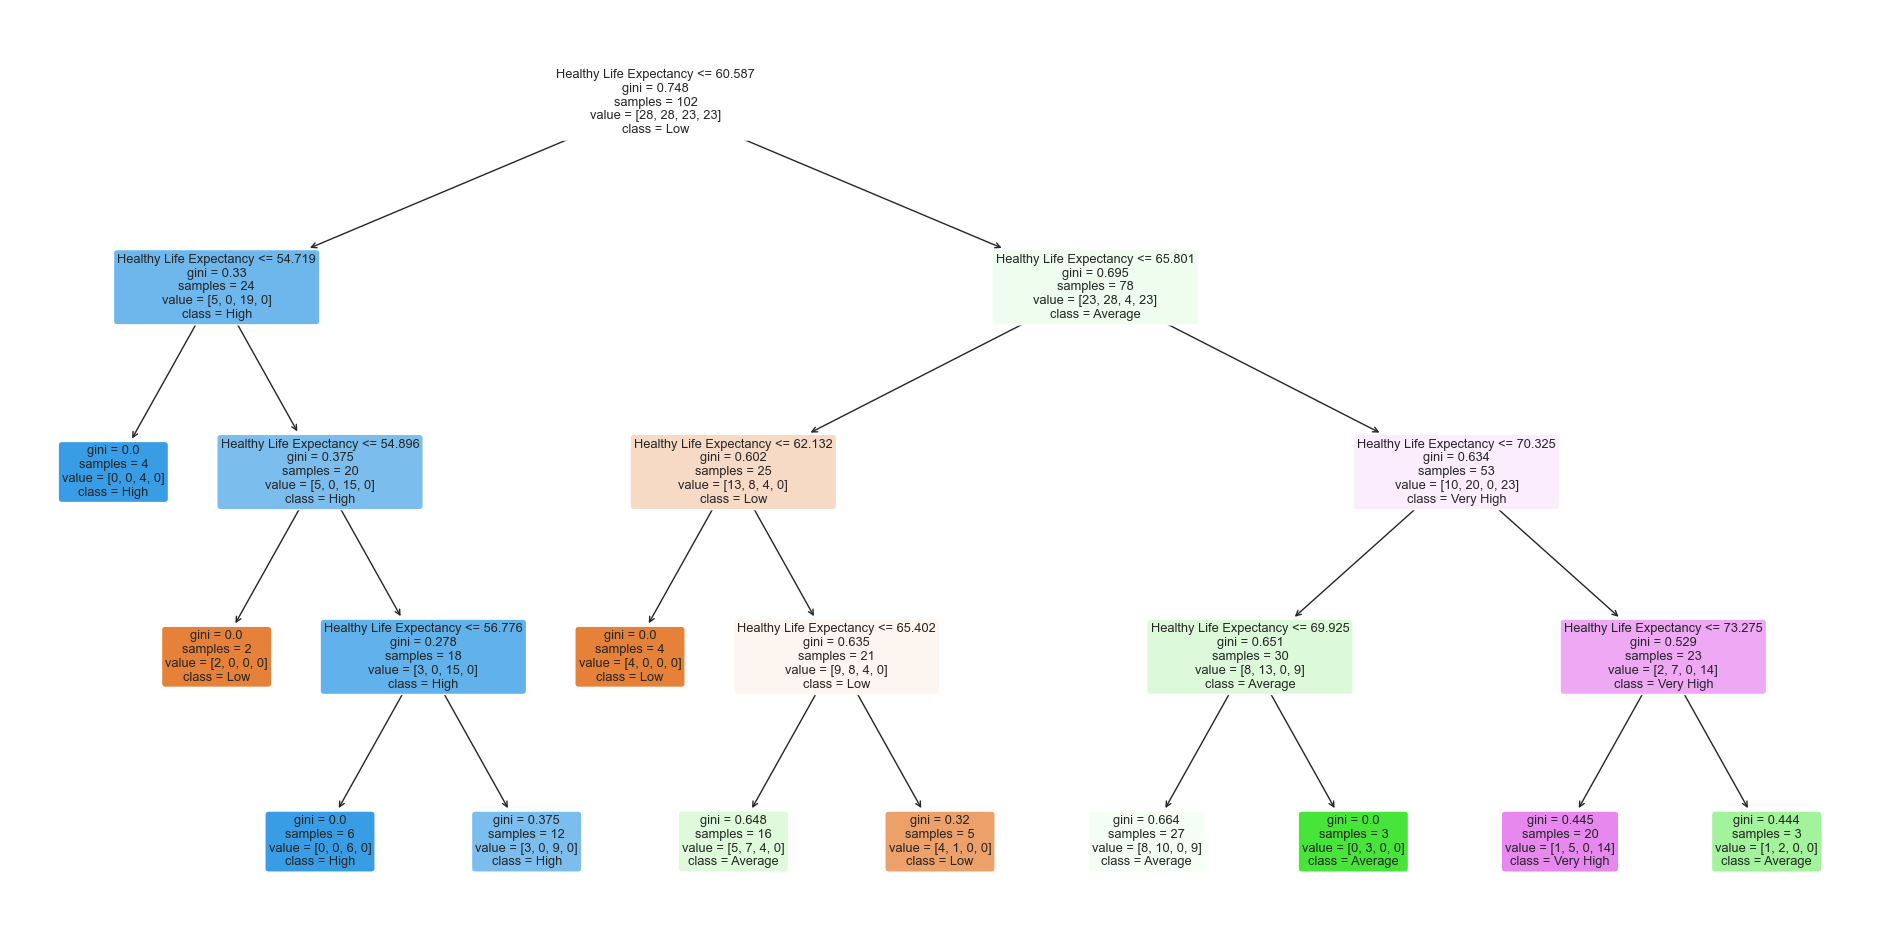

In [253]:
#plot Decision Tree Classifier Train Model
f =plt.figure(figsize=(24,12))
plot_tree(dectree_train, filled = True, rounded = True, feature_names = ["Healthy Life Expectancy"], class_names =["Low","Average","High","Very High"])

We then use the train datas make to create a confusion matrix to help evaluate the accuracy of the model

In [254]:
# Evaluate the train model
HL_train_pred = dectree_train.predict(Healthylife_train)

# Confusion Matrix for Train dataset

<AxesSubplot:>

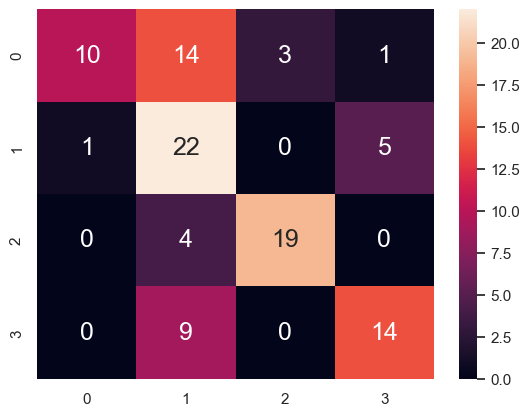

In [255]:
#Print the Confusion Matrix for Healthylife (SS) train for depth 4 
sb.heatmap(confusion_matrix(SS_train, HL_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [256]:
# 0 = Low 1 = Average 2= High 3= Very high 

# Calculating TNR, TPR, FNR, FPR for train

In [257]:
# Evaluate the model
#To check for accuracies of model
print("Classification Accuracy for Train \t:", dectree_train.score(Healthylife_train, SS_train))

Classification Accuracy for Train 	: 0.6372549019607843


 We then calculate the positive and negative rates, there are 4 results each for each classes(low,Average, High, Very High) evaluation so when we do calculation for the class low which is at row 0 and column 0. At that spot it will be known as True Positive, while the rest in the same row of the True positive spot is known as False Positive, while as the same column of the True positive spot is known as False Negative. Then the remaining is known as True Negative. This variables will change depending on which class is the calculation been done to.


These metrics provide insight into the model's ability to accurately classify positive and negative instances, and can inform decisions about model tuning and optimization.

TPR represents the proportion of actual positive instances that are correctly identified by the model


In [258]:
Classify_train = confusion_matrix(SS_train,HL_train_pred)
#True Positive Rate
print("Train - True Positive Rate for low:",Classify_train[0][0]/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3]))
print("Train - True Positive Rate for Average:",Classify_train[1][1]/(Classify_train[0][1]+Classify_train[1][1]+Classify_train[2][1]+Classify_train[3][1]))
print("Train - True Positive Rate for High:",Classify_train[2][2]/(Classify_train[0][2]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[2][3]))
print("Train - True Positive Rate for Very High:",Classify_train[3][3]/(Classify_train[0][3]+Classify_train[1][3]+Classify_train[2][3]+Classify_train[3][3]))

Train - True Positive Rate for low: 0.35714285714285715
Train - True Positive Rate for Average: 0.4489795918367347
Train - True Positive Rate for High: 0.7307692307692307
Train - True Positive Rate for Very High: 0.7


FPR represents the proportion of actual negative instances that are incorrectly identified as positive.

In [259]:
Classify_train = confusion_matrix(SS_train,HL_train_pred)
#False Positive Rate
print("Train - False Positive Rate for low:",(Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3])/(Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3]+Classify_train[1][1]+Classify_train[1][2]+Classify_train[1][3]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][1]+Classify_train[3][2]+Classify_train[3][3]))
print("Train - False Positive Rate for Average:",(Classify_train[1][0]+Classify_train[1][2]+Classify_train[1][3])/(Classify_train[0][0]+Classify_train[0][2]+Classify_train[0][3]+Classify_train[2][0]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][0]+Classify_train[3][2]+Classify_train[3][3]+Classify_train[1][0]+Classify_train[1][2]+Classify_train[1][3]))
print("Train - False Positive Rate for High:",(Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][3])/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][3]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][3]+Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][3]+Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][3]))
print("Train - False Positive Rate for Very High:",(Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][2])/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][2]+Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][2]))

Train - False Positive Rate for low: 0.1978021978021978
Train - False Positive Rate for Average: 0.11320754716981132
Train - False Positive Rate for High: 0.05
Train - False Positive Rate for Very High: 0.10975609756097561


TNR represents the proportion of actual negative instances that are correctly identified.

In [260]:
Classify_train = confusion_matrix(SS_train,HL_train_pred)
#True Negative Rate
print("Train - True Negative Rate for low:",(Classify_train[1][1]+Classify_train[1][2]+Classify_train[1][3]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][1]+Classify_train[3][2]+Classify_train[3][3])/(Classify_train[1][1]+Classify_train[1][2]+Classify_train[1][3]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][1]+Classify_train[3][2]+Classify_train[3][3]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3]))
print("Train - True Negative Rate for Average:",(Classify_train[0][0]+Classify_train[0][2]+Classify_train[0][3]+Classify_train[2][0]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][0]+Classify_train[3][2]+Classify_train[3][3])/(Classify_train[0][0]+Classify_train[0][2]+Classify_train[0][3]+Classify_train[2][0]+Classify_train[2][2]+Classify_train[2][3]+Classify_train[3][0]+Classify_train[3][2]+Classify_train[3][3]+Classify_train[1][0]+Classify_train[1][2]+Classify_train[1][3]))
print("Train - True Negative Rate for High:",(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][3]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][3]+Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][3])/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][3]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][3]+Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][3]+Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][3]))
print("Train - True Negative Rate for Very High:",(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][2]+Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][2])/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[1][0]+Classify_train[1][1]+Classify_train[1][2]+Classify_train[2][0]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[3][0]+Classify_train[3][1]+Classify_train[3][2]))

Train - True Negative Rate for low: 0.8021978021978022
Train - True Negative Rate for Average: 0.8867924528301887
Train - True Negative Rate for High: 0.95
Train - True Negative Rate for Very High: 0.8902439024390244


FNR represents the proportion of actual positive instances that are incorrectly identified as negative.

In [261]:
Classify_train = confusion_matrix(SS_train,HL_train_pred)
#False Negative Rate
print("Train - False Negative Rate for low:",(Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3])/(Classify_train[0][0]+Classify_train[0][1]+Classify_train[0][2]+Classify_train[0][3]))
print("Train - False Negative Rate for Average:",(Classify_train[0][1]+Classify_train[2][1]+Classify_train[3][1])/(Classify_train[0][1]+Classify_train[1][1]+Classify_train[2][1]+Classify_train[3][1]))
print("Train - False Negative Rate for High:",(Classify_train[0][2]+Classify_train[2][1]+Classify_train[2][3])/(Classify_train[0][2]+Classify_train[2][1]+Classify_train[2][2]+Classify_train[2][3]))
print("Train - False Negative Rate for Very High:",(Classify_train[0][3]+Classify_train[1][3]+Classify_train[2][3])/(Classify_train[0][3]+Classify_train[1][3]+Classify_train[2][3]+Classify_train[3][3]))

Train - False Negative Rate for low: 0.6428571428571429
Train - False Negative Rate for Average: 0.5510204081632653
Train - False Negative Rate for High: 0.2692307692307692
Train - False Negative Rate for Very High: 0.3


We change the predictors array from a 1 dimension to a 2 dimension as each row in the two-dimensional array represents an instance of the data, and each column represents a feature. By considering the values of multiple features, the classification tree is able to make more complex and accurate decisions about the classification of new instances.

In [262]:
#Test Model for (SS) Healthy life expectancy
#reshape the data from a 1D array to a 2D array
Healthylife_test= np.array(Healthylife_test)
Healthylife_test=Healthylife_test.reshape(-1, 1)
Healthylife_test

array([[60.5  ],
       [67.   ],
       [65.65 ],
       [65.9  ],
       [60.777],
       [60.946],
       [55.032],
       [67.275],
       [57.449],
       [56.989],
       [66.149],
       [61.847],
       [53.125],
       [63.599],
       [69.15 ],
       [71.675],
       [67.5  ],
       [68.838],
       [71.6  ],
       [69.   ],
       [70.899],
       [59.425],
       [71.3  ],
       [69.049],
       [64.05 ],
       [56.55 ]])

In [263]:
dectree_test = DecisionTreeClassifier(max_depth = 4)

In [264]:
# Train the Decision Tree Classifier test model
dectree_test.fit (Healthylife_test,SS_test)

DecisionTreeClassifier(max_depth=4)

# Decision Tree for Test dataset

[Text(0.4, 0.9, 'Healthy Life Expectancy <= 61.396\ngini = 0.713\nsamples = 26\nvalue = [4, 4, 9, 9]\nclass = High'),
 Text(0.2, 0.7, 'Healthy Life Expectancy <= 56.769\ngini = 0.346\nsamples = 9\nvalue = [0, 0, 7, 2]\nclass = High'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]\nclass = High'),
 Text(0.3, 0.5, 'Healthy Life Expectancy <= 57.219\ngini = 0.444\nsamples = 6\nvalue = [0, 0, 4, 2]\nclass = High'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]\nclass = Very High'),
 Text(0.4, 0.3, 'Healthy Life Expectancy <= 59.962\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 4, 1]\nclass = High'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0]\nclass = High'),
 Text(0.5, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 0, 2, 1]\nclass = High'),
 Text(0.6, 0.7, 'Healthy Life Expectancy <= 63.825\ngini = 0.706\nsamples = 17\nvalue = [4, 4, 2, 7]\nclass = Very High'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]\nclass = Low'),
 Te

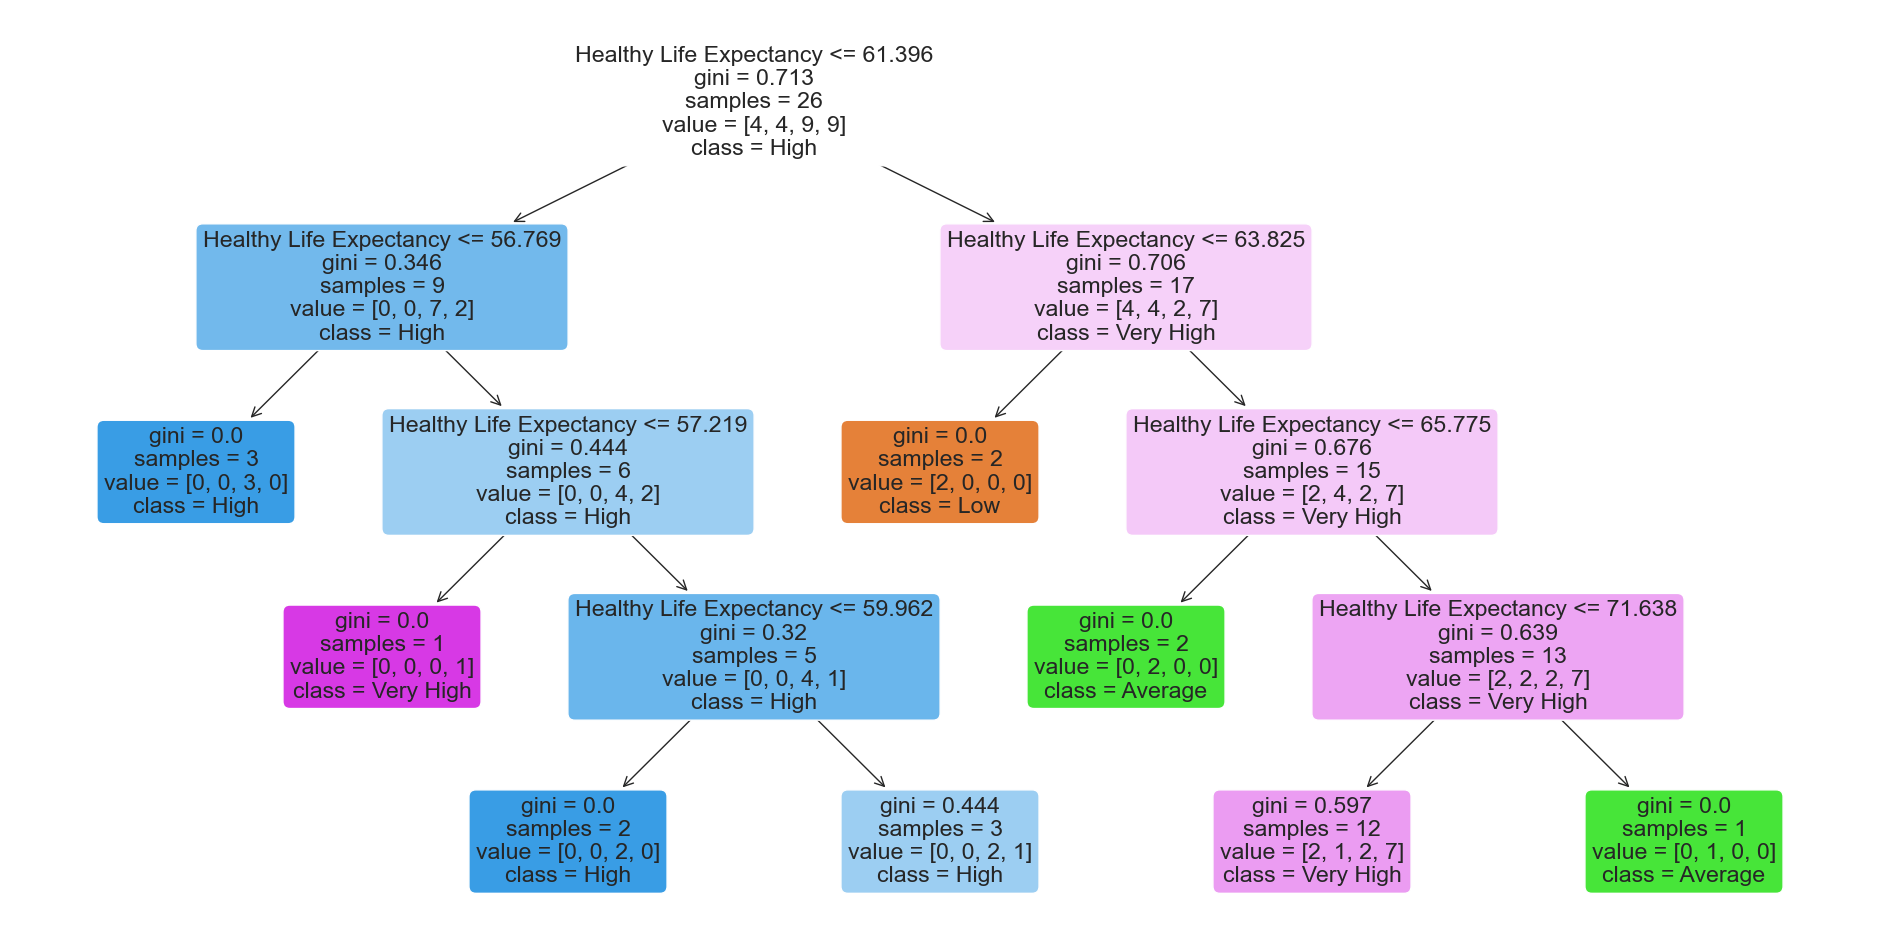

In [265]:
#plot Decision Tree Classifier Test Model
f =plt.figure(figsize=(24,12))
plot_tree(dectree_test, filled = True, rounded = True, feature_names = ["Healthy Life Expectancy"], class_names =["Low","Average","High","Very High"])

We then use the test datas make to create a confusion matrix to help evaluate the accuracy of the model 

In [266]:
# Evaluate the test model
HL_test_pred = dectree_train.predict(Healthylife_test)

# Confusion Matrix for Test dataset

<AxesSubplot:>

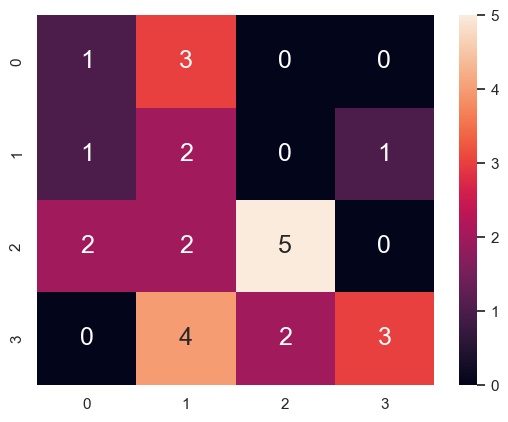

In [267]:
#Print the Confusion Matrix for Healthylife (SS) test for depth 4 
sb.heatmap(confusion_matrix(SS_test, HL_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Calculating TNR, TPR, FNR, FPR for test

In [268]:
# Evaluate the model
#To check for accuracies of model
print("Classification Accuracy for Test \t:", dectree_train.score(Healthylife_test, SS_test))

Classification Accuracy for Test 	: 0.4230769230769231


The classification accuracy of 0.423 sugggests that social support is only moderately correlated to life expectancy

Similar to just now we then calculate the positive and negative rates, there are 4 results each for each classes(low,Average, High, Very High) evaluation so when we do calculation for the class low which is at row 0 and column 0. At that spot it will be known as True Positive, while the rest in the same row of the True positive spot is known as False Positive, while as the same column of the True positive spot is known as False Negative. Then the remaining is known as True Negative. This variables will change depending on which class is the calculation been done to.

These metrics provide insight into the model's ability to accurately classify positive and negative instances, and can inform decisions about model tuning and optimization.


TPR represents the proportion of actual positive instances that are correctly identified by the model

In [269]:
Classify = confusion_matrix(SS_test,HL_test_pred)
#True Positive Rate
print("Test - True Positive Rate for low:",Classify[0][0]/(Classify[0][0]+Classify[0][1]+Classify[0][2]+Classify[0][3]))
print("Test - True Positive Rate for Average:",Classify[1][1]/(Classify[0][1]+Classify[1][1]+Classify[2][1]+Classify[3][1]))
print("Test - True Positive Rate for High:",Classify[2][2]/(Classify[0][2]+Classify[2][1]+Classify[2][2]+Classify[2][3]))
print("Test - True Positive Rate for Very High:",Classify[3][3]/(Classify[0][3]+Classify[1][3]+Classify[2][3]+Classify[3][3]))

Test - True Positive Rate for low: 0.25
Test - True Positive Rate for Average: 0.18181818181818182
Test - True Positive Rate for High: 0.7142857142857143
Test - True Positive Rate for Very High: 0.75


FPR represents the proportion of actual negative instances that are incorrectly identified as positive.

In [270]:
Classify = confusion_matrix(SS_test,HL_test_pred)
#False Positive Rate
print("Test - False Positive Rate for low:",(Classify[0][1]+Classify[0][2]+Classify[0][3])/(Classify[1][1]+Classify[1][2]+Classify[1][3]+Classify[2][1]+Classify[2][2]+Classify[2][3]+Classify[3][1]+Classify[3][2]+Classify[3][3]+Classify[0][1]+Classify[0][2]+Classify[0][3]))
print("Test - False Positive Rate for Average:",(Classify[1][0]+Classify[1][2]+Classify[1][3])/(Classify[0][0]+Classify[0][2]+Classify[0][3]+Classify[2][0]+Classify[2][2]+Classify[2][3]+Classify[3][0]+Classify[3][2]+Classify[3][3]+Classify[1][0]+Classify[1][2]+Classify[1][3]))
print("Test - False Positive Rate for High:",(Classify[2][0]+Classify[2][1]+Classify[2][3])/(Classify[0][0]+Classify[0][1]+Classify[0][3]+Classify[1][0]+Classify[1][1]+Classify[1][3]+Classify[3][0]+Classify[3][1]+Classify[3][3]+Classify[2][0]+Classify[2][1]+Classify[2][3]))
print("Test - False Positive Rate for Very High:",(Classify[3][0]+Classify[3][1]+Classify[3][2])/(Classify[0][0]+Classify[0][1]+Classify[0][2]+Classify[1][0]+Classify[1][1]+Classify[1][2]+Classify[2][0]+Classify[2][1]+Classify[2][2]+Classify[3][0]+Classify[3][1]+Classify[3][2]))

Test - False Positive Rate for low: 0.13636363636363635
Test - False Positive Rate for Average: 0.13333333333333333
Test - False Positive Rate for High: 0.21052631578947367
Test - False Positive Rate for Very High: 0.2727272727272727


TNR represents the proportion of actual negative instances that are correctly identified.

In [271]:
Classify = confusion_matrix(SS_test,HL_test_pred)
#True Negative Rate
print("Test - True Negative Rate for low:",(Classify[1][1]+Classify[1][2]+Classify[1][3]+Classify[2][1]+Classify[2][2]+Classify[2][3]+Classify[3][1]+Classify[3][2]+Classify[3][3])/(Classify[1][1]+Classify[1][2]+Classify[1][3]+Classify[2][1]+Classify[2][2]+Classify[2][3]+Classify[3][1]+Classify[3][2]+Classify[3][3]+Classify[0][1]+Classify[0][2]+Classify[0][3]))
print("Test - True Negative Rate for Average:",(Classify[0][0]+Classify[0][2]+Classify[0][3]+Classify[2][0]+Classify[2][2]+Classify[2][3]+Classify[3][0]+Classify[3][2]+Classify[3][3])/(Classify[0][0]+Classify[0][2]+Classify[0][3]+Classify[2][0]+Classify[2][2]+Classify[2][3]+Classify[3][0]+Classify[3][2]+Classify[3][3]+Classify[1][0]+Classify[1][2]+Classify[1][3]))
print("Test - True Negative Rate for High:",(Classify[0][0]+Classify[0][1]+Classify[0][3]+Classify[1][0]+Classify[1][1]+Classify[1][3]+Classify[3][0]+Classify[3][1]+Classify[3][3])/(Classify[0][0]+Classify[0][1]+Classify[0][3]+Classify[1][0]+Classify[1][1]+Classify[1][3]+Classify[3][0]+Classify[3][1]+Classify[3][3]+Classify[2][0]+Classify[2][1]+Classify[2][3]))
print("Test - True Negative Rate for Very High:",(Classify[0][0]+Classify[0][1]+Classify[0][2]+Classify[1][0]+Classify[1][1]+Classify[1][2]+Classify[2][0]+Classify[2][1]+Classify[2][2])/(Classify[0][0]+Classify[0][1]+Classify[0][2]+Classify[1][0]+Classify[1][1]+Classify[1][2]+Classify[2][0]+Classify[2][1]+Classify[2][2]+Classify[3][0]+Classify[3][1]+Classify[3][2]))

Test - True Negative Rate for low: 0.8636363636363636
Test - True Negative Rate for Average: 0.8666666666666667
Test - True Negative Rate for High: 0.7894736842105263
Test - True Negative Rate for Very High: 0.7272727272727273


FNR represents the proportion of actual positive instances that are incorrectly identified as negative.

In [272]:
Classify = confusion_matrix(SS_test,HL_test_pred)
#False Negative Rate
print("Test - False Negative Rate for low:",(Classify[0][1]+Classify[0][2]+Classify[0][3])/(Classify[0][0]+Classify[0][1]+Classify[0][2]+Classify[0][3]))
print("Test - False Negative Rate for Average:",(Classify[0][1]+Classify[2][1]+Classify[3][1])/(Classify[0][1]+Classify[1][1]+Classify[2][1]+Classify[3][1]))
print("Test - False Negative Rate for High:",(Classify[0][2]+Classify[2][1]+Classify[2][3])/(Classify[0][2]+Classify[2][1]+Classify[2][2]+Classify[2][3]))
print("Test - False Negative Rate for Very High:",(Classify[0][3]+Classify[1][3]+Classify[2][3])/(Classify[0][3]+Classify[1][3]+Classify[2][3]+Classify[3][3]))

Test - False Negative Rate for low: 0.75
Test - False Negative Rate for Average: 0.8181818181818182
Test - False Negative Rate for High: 0.2857142857142857
Test - False Negative Rate for Very High: 0.25


# Conclusion

Overall, we set out to find one main factor that is the most critial in predicting one's life expectancy. We believe the factor to be logged GDP per capita, or in other words, the average income earned by an individual. We came to the conclusion by using the two Machine Learning techniques and finally we found a variable that is significantly more highly correlated than others and that is GDP. Hence, for higher income earnt correlates to higher life expectancy.

Although both Machine Learning techniques show similar results in terms of their correlation with GDP, Linear Regression would be the more appropriate choice when dealing with two continuous variables. This is because the Classification Tree algorithm requires the conversion of continuous variables into categorical variables through a process called discretization, which may lead to loss of accuracy. Discretization is not foolproof and may not always capture the true nature of the data, making Linear Regression a more reliable method.

Discretization is known to have potential flaws which arise from its sensitivity to the choice of bin width or the intervals of grouping. The selection of these intervals is a critical step in ensuring the accuracy of discretization, but there is no universally agreed-upon method to create them. Additionally, discretization can lead to a loss of accuracy when a significant amount of data is concentrated around the median or there are many unique values. This is because grouping values into intervals or bins may result in over-simplification of the data, leading to a loss of information or misclassification of important patterns. Therefore, the application of discretization in data analysis should be done with caution, and alternative methods that do not involve such loss of information should be explored.